### This notebook is to explore training dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from pprint import pprint
from feature_engine import missing_data_imputers as mdi

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('trainoriginal.csv')

In [3]:
df.head()

row_id county_code    state  population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate                                               rucc                                    urban_influence        economic_typology  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
0       0     8e686a7  fb8cab1        3876                         408               24.583        NaN       18.380   0.945945   0.010761      0.026038    0.005685   0.005635        0.0      0.005935   0.000000         4.172  Nonmetro - Completely rural or less than 2,500...  Noncore adjacent to micro area and does not co...  Manufacturing-dependent               0.550             0.023                 0.107                   0.062              0.310              0.166         0.100                  NaN                   0.262                    0.342                               11.022908                 NaN                                  NaN                               217              NaN                             NaN       0.471                      0.218                        0.190                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342         577
1       1     d1b5fc5  842bd12       10224                        1166               28.346        3.0       26.694   0.808959   0.002284      0.173426    0.001803   0.001493        0.0      0.012033   0.000000         7.714  Nonmetro - Completely rural or less than 2,500...          Micropolitan not adjacent to a metro area               Recreation               0.545             0.040                 0.324                   0.201              0.253              0.102         0.066                0.070                   0.200                    0.148                                9.904099                 NaN                                18.26                               181           2009.0                          1690.0       0.472                      0.290                        0.077                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219         844
2       2     19a463b  2b7da97       27023                        2927               21.641        9.0       31.028   0.956621   0.005141      0.013088    0.004728   0.004708        0.0      0.014809   0.000905         9.789  Nonmetro - Urban population of 2,500 to 19,999...  Noncore not adjacent to a metro/micro area and...               Recreation               0.508             0.063                 0.129                   0.032              0.296              0.215         0.087                0.070                   0.187                    0.258                               11.011502                 NaN                                19.94                               234           4650.0                          1350.0       0.496                      0.208                        0.192                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572         700
3      

In [4]:
df.tail()

row_id county_code    state  population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate                                               rucc                                    urban_influence                   economic_typology  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  \
1557    1557     8a15c79  a952566       18983                        1480               22.621       41.0       26.905   0.847652   0.064786      0.048670    0.000000   0.012277   0.001800      0.024815   0.000000         5.699  Metro - Counties in metro areas of fewer than ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized               0.517             0.044                 0.216                   0.086              0.302                NaN         0.096                0.079                     NaN                    0.227                               12.942281                 NaN                                28.94                               207           6299.0                          4660.0       0.510                      0.243                        0.144                                    0.153614                             0.347390                      0.263052                        0.235944          11.369618   
1558    1558     ffaffbd  e2f94fa       18837                        2144               28.649        7.0       26.515   0.925500   0.010666      0.028790    0.000398   0.020893   0.001085      0.012667   0.000000         6.789  Nonmetro - Urban population of 2,500 to 19,999...  Noncore adjacent to micro area and contains a ...                      Nonspecialized               0.559             0.043                 0.112                   0.038              0.294              0.169         0.081                0.060                   0.166                    0.242                               10.669456                 NaN                                18.02                               272           2030.0                          1249.0       0.510                      0.205                        0.193                                    0.070858                             0.371257                      0.311377                        0.246507           9.330009   
1559    1559     4268c79  a952566       77224                        4677               18.928      137.0       28.827   0.883936   0.070858      0.019081    0.000614   0.012569   0.000302      0.011835   0.000805         6.294  Metro - Counties in metro areas of 250,000 to ...  Small-in a metro area with fewer than 1 millio...                      Nonspecialized               0.498             0.051                 0.172                   0.071              0.260              0.193         0.096                0.080                   0.168                    0.298                               12.962100                 NaN                                13.78                               237           6979.0                          1529.0       0.503                      0.211                        0.179                                    0.118644                             0.311067                      0.302094                        0.268195           9.029286   
1560    1560     ff00193  4cd9667        4698                     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 46 columns):
row_id                                        1562 non-null int64
county_code                                   1562 non-null object
state                                         1562 non-null object
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1235 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi        

In [6]:
df.describe()

row_id    population  renter_occupied_households  pct_renter_occupied     evictions  rent_burden    pct_white    pct_af_am  pct_hispanic   pct_am_ind    pct_asian    pct_nh_pi  pct_multiple    pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician   pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k   gross_rent
count  1562.000000  1.562000e+03                1.562000e+03          1562.000000   1235.000000  1562.000000  1562.000000  1562.000000   1562.000000  1562.000000  1562.000000  1562.000000   1562.000000  1562.000000   1562.000000         1562.000000       1562.000000           1560.000000             1560.000000        1560.000000        1344.000000   1560.000000          1446.000000             1100.000000              1560.000000                             1542.000000          613.000000                          1372.000000                       1562.000000      1447.000000                     1448.000000  1560.000000                1560.000000                  1560.000000                                 1562.000000                          1562.000000                   1562.000000                     1562.000000        1562.000000        1562.000000  1562.000000
mean    780.500000  1.083407e+05                1.490462e+04            28.525570    397.410526    28.537526     0.769045     0.088593      0.092012     0.018431     0.012709     0.000711      0.017583     0.000916     12.182780            0.470535          0.062551              0.220037                0.088844           0.304546           0.211682      0.106566             0.083326                0.164818                 0.276981                               11.637336            5.752414                            21.715153                        275.482714      3421.828611                     2508.303867     0.499388                   0.228672                     0.167707                                    0.145666                             0.346271                      0.303030                        0.205033          11.621356          10.415138   701.142125
std     451.054875  3.745229e+05                6.255947e+04             8.121601   1522.801074     4.670467     0.203306     0.143505      0.141599     0.074762     0.026693     0.003059      0.015836     0.001657      5.783889            0.070936          0.022615              0.067500                0.041480           0.043550           0.064045      0.022521             0.021239                0.051483                 0.053098                                1.534144            4.297808                            10.721369                         57.827540      2538.670834                     1960.312344     0.023933                   0.034732                     0.044555                                    0.067483                             0.071152                      0.052236                        0.092001           2.756009           2.772070   192.883110
min       0.000000  2.690000e+02                6.400000e+01             7.279000     -1.000000     9.909000     0.009547     0.000000      0.000000     0.000000     0.000000     0.000000      0.000000     0.000000      0.000000            0.186000          0.012000              0.053000                0.018000           0.133000           0.031000      0.033000             0.030000                0.032000                 0.104000                                7.209413           -0.080000      

In [7]:
df.shape

(1562, 46)

In [8]:
df_numeric = df.drop(['row_id','county_code','state','rucc','urban_influence','economic_typology'],axis=1)

In [9]:
df_numeric.head()

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
0        3876                         408               24.583        NaN       18.380   0.945945   0.010761      0.026038    0.005685   0.005635        0.0      0.005935   0.000000         4.172               0.550             0.023                 0.107                   0.062              0.310              0.166         0.100                  NaN                   0.262                    0.342                               11.022908                 NaN                                  NaN                               217              NaN                             NaN       0.471                      0.218                        0.190                                    0.083250                             0.327984                      0.389168                        0.199599          10.008982           9.752342         577
1       10224                        1166               28.346        3.0       26.694   0.808959   0.002284      0.173426    0.001803   0.001493        0.0      0.012033   0.000000         7.714               0.545             0.040                 0.324                   0.201              0.253              0.102         0.066                0.070                   0.200                    0.148                                9.904099                 NaN                                18.26                               181           2009.0                          1690.0       0.472                      0.290                        0.077                                    0.099099                             0.202202                      0.302302                        0.396396          14.482893           3.013219         844
2       27023                        2927               21.641        9.0       31.028   0.956621   0.005141      0.013088    0.004728   0.004708        0.0      0.014809   0.000905         9.789               0.508             0.063                 0.129                   0.032              0.296              0.215         0.087                0.070                   0.187                    0.258                               11.011502                 NaN                                19.94                               234           4650.0                          1350.0       0.496                      0.208                        0.192                                    0.137725                             0.387226                      0.255489                        0.219561           9.620346          10.873572         700
3        8735                        1039               23.110        0.0       27.734   0.894835   0.000298      0.076576    0.000995   0.004297        0.0      0.022999   0.000000        13.735               0.545             0.038                 0.207                   0.084              0.255              0.182         0.104                0.081                   0.169                    0.274                               12.845770                 NaN                                30.31                               231           4420.0                          1749.0       0.503                      0.193           

In [10]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 40 columns):
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1235 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi                                     1562 non-null float64
pct_multiple                                  1562 non-null float64
pct_other                                     1562 non-null float64
poverty_rate 

In [11]:
df_numeric.shape

(1562, 40)

In [12]:
df_numeric.corr(method='pearson')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
population                                    1.000000                    0.979015             0.285874   0.800173     0.162747  -0.233149   0.065498      0.194042   -0.047605   0.459903   0.086141      0.074529   0.219683     -0.029601            0.074573          0.004028              0.000057               -0.059270          -0.217103          -0.195657     -0.172038            -0.029178               -0.000721                -0.240345                               -0.102763           -0.026795                            -0.269513                         -0.133897        -0.166771                       -0.134868    0.102691                   0.067631                    -0.202828                                   -0.029638                            -0.303886                     -0.068912                        0.295888           0.099957          -0.252709    0.398343
renter_occupied_households                    0.979015                    1.000000             0.320175   0.790723     0.146213  -0.227568   0.076058      0.176860   -0.040348   0.435849   0.076874      0.069009   0.218633     -0.002518            0.065894          0.009995              0.014840               -0.047528          -0.197820          -0.172043     -0.150268            -0.013490               -0.004593                -0.206235                               -0.101503            0.018712                            -0.237650                         -0.112827        -0.149875                       -0.121639    0.092542                   0.040795                    -0.182385                                   -0.011385                            -0.271734                     -0.075980                        0.261647           0.099201          -0.221893    0.345154
pct_renter_occupied                           0.285874                    0.320175             1.000000   0.357836     0.229203  -0.472168   0.283012      0.211543    0.140909   0.407788   0.172797      0.195395   0.231417      0.311045           -0.009933          0.123263              0.182252                0.011460          -0.052990          -0.076117     -0.134396             0.159542               -0.056945                -0.154324                               -0.052468            0.230084                            -0.239387                          0.030945        -0.246900                       -0.243364    0.026768                   0.110950                    -0.457286                                    0.103800                            -0.372389                     -0.076354                        0.255215           0.319060          -0.320552    0.278613
evictions                                     0.800173                    0.790723             0.357836   1.000000     0.147673  -0.286329   0.187811      0.146569   -0.036577   0.390145   0.025700      0.080335   0.204129      0.026839            0.082754          0.010476              0.046369               -0.041610          -0.121492          -0.148882     -0.121295             0.056684               -0.016261                -0.180947                               -0.051053            0.154634      

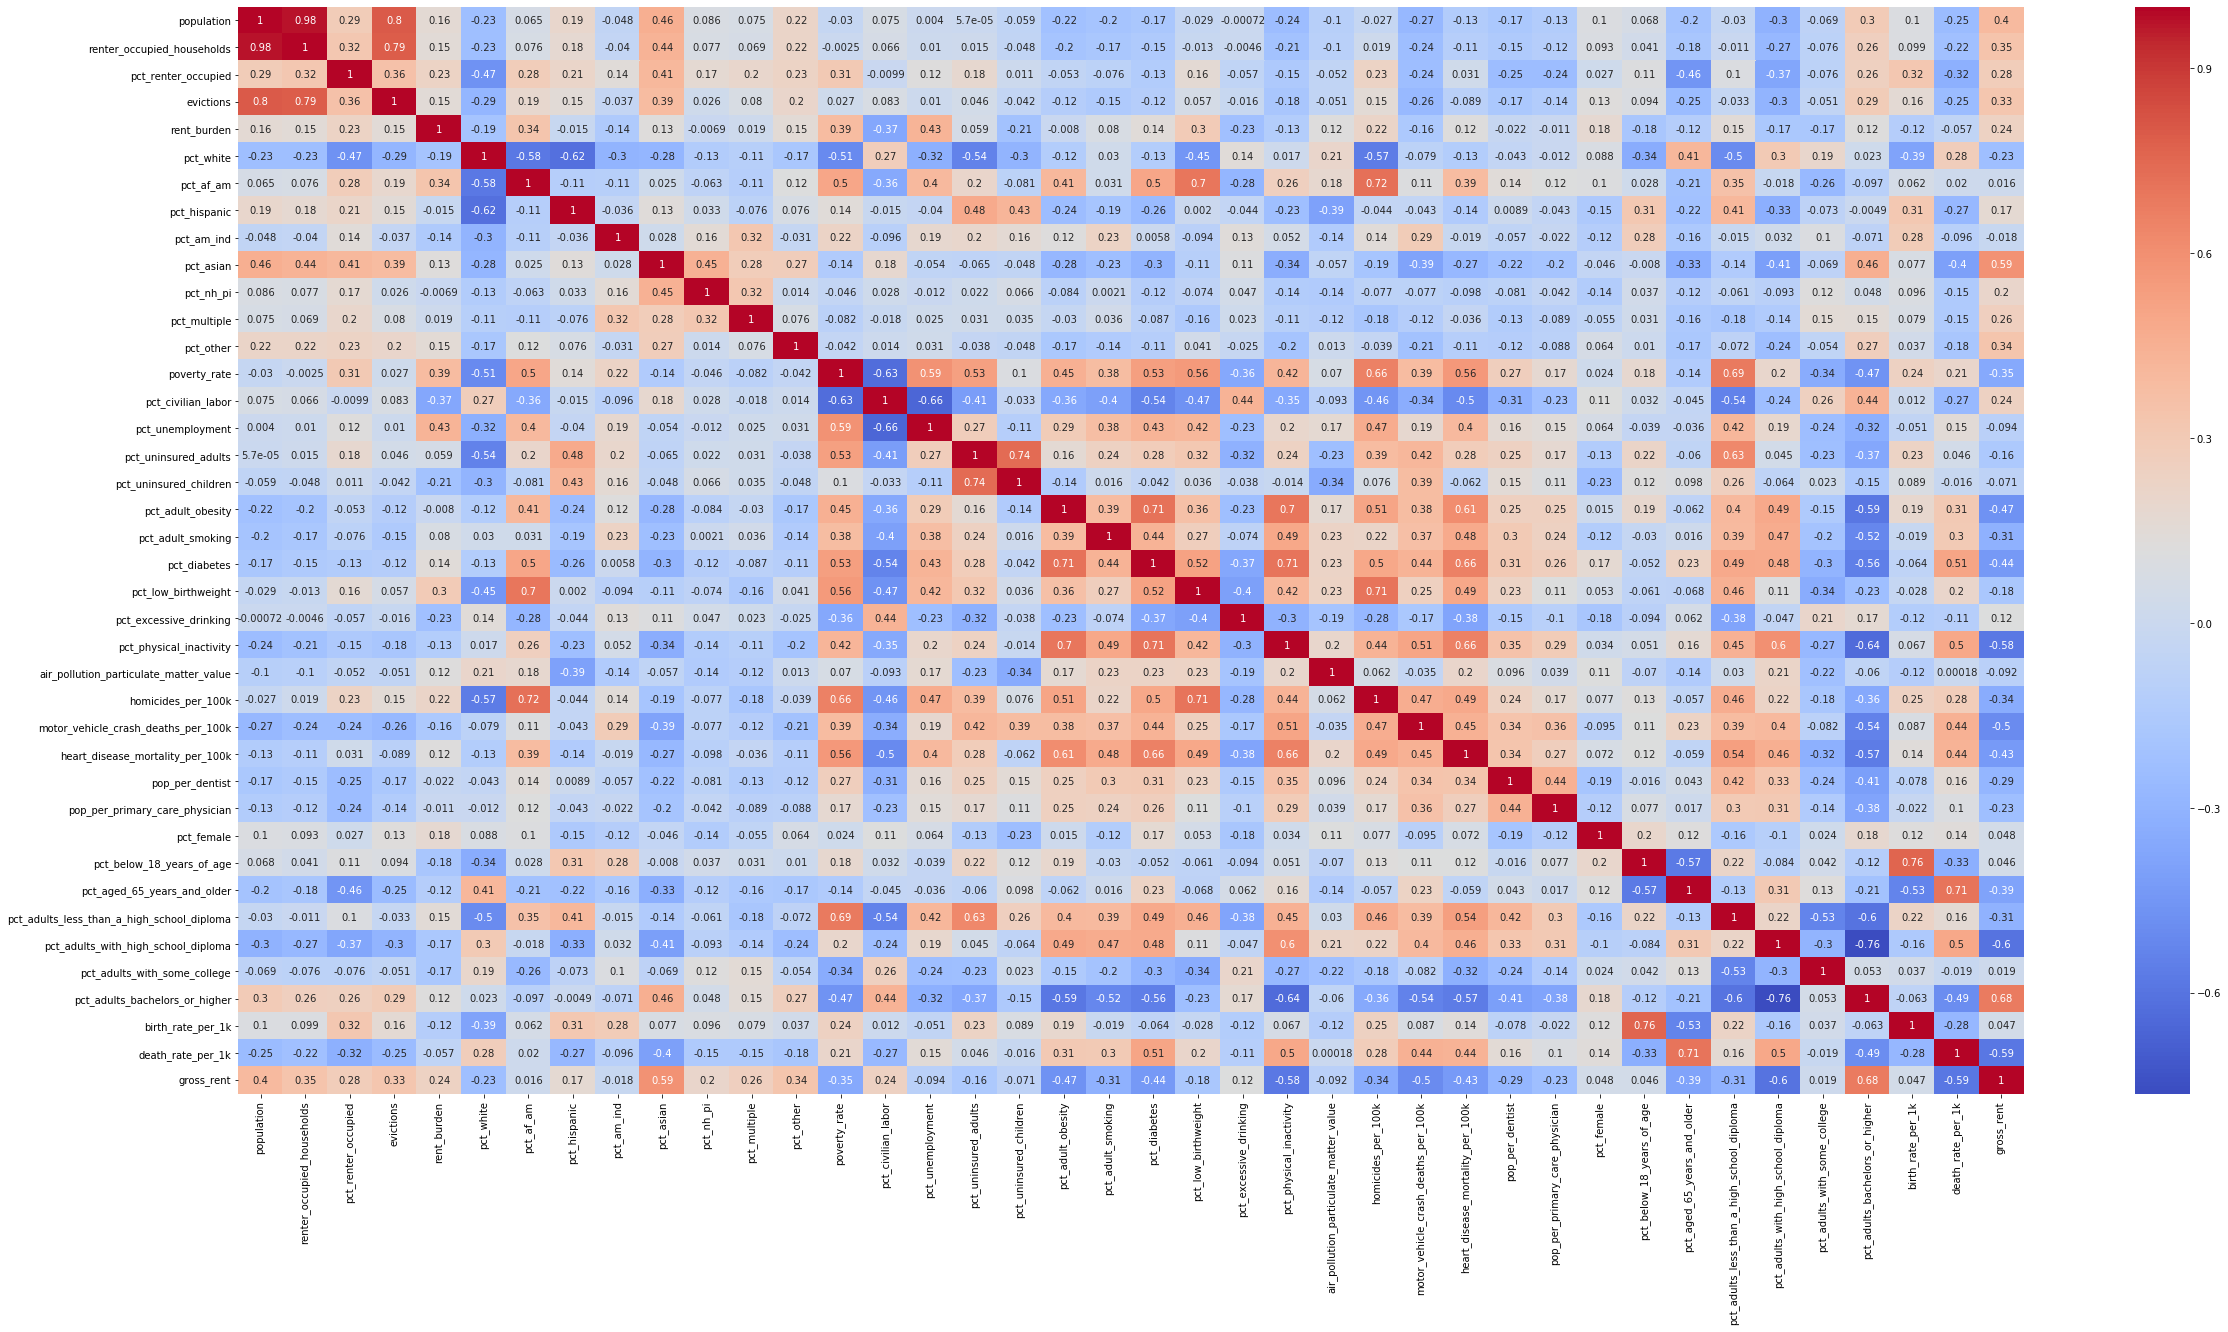

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='pearson'),annot=True,cmap="coolwarm")
plt.show()

In [14]:
df_numeric.corr(method='kendall')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
population                                    1.000000                    0.903716             0.218808   0.722761     0.311029  -0.176908   0.301707      0.195852   -0.033639   0.473937   0.260458      0.222173   0.401304     -0.016912            0.040352          0.078992             -0.119886               -0.244600          -0.103292          -0.109515     -0.103236             0.000108               -0.042718                -0.225823                                0.072808           -0.284204                            -0.471500                         -0.063305        -0.252221                       -0.224126    0.222212                   0.092933                    -0.352534                                   -0.084602                            -0.264632                     -0.028078                        0.284400           0.121174          -0.296106    0.468119
renter_occupied_households                    0.903716                    1.000000             0.300274   0.728398     0.329950  -0.200347   0.312839      0.209113   -0.025833   0.491508   0.271061      0.236812   0.404786      0.012519            0.032936          0.093455             -0.100655               -0.240235          -0.105599          -0.106338     -0.105391             0.019826               -0.048942                -0.223473                                0.070687           -0.245793                            -0.471145                         -0.053208        -0.283975                       -0.260357    0.236672                   0.083530                    -0.352887                                   -0.077239                            -0.283875                     -0.029993                        0.294102           0.135677          -0.283572    0.453919
pct_renter_occupied                           0.218808                    0.300274             1.000000   0.250759     0.174560  -0.337335   0.213529      0.221056    0.043893   0.282809   0.200043      0.174776   0.198655      0.221058           -0.038511          0.077378              0.145262                0.020168          -0.022941          -0.046655     -0.072165             0.121349               -0.061290                -0.079126                               -0.022577            0.127970                            -0.167878                          0.020825        -0.226291                       -0.232438    0.110065                   0.089830                    -0.293293                                    0.081204                            -0.243052                     -0.045489                        0.132236           0.224756          -0.178739    0.166800
evictions                                     0.722761                    0.728398             0.250759   1.000000     0.290903  -0.163336   0.322742      0.121926   -0.005885   0.434924   0.229630      0.243662   0.374612     -0.009005            0.037826          0.096752             -0.129786               -0.258380          -0.026903          -0.050879     -0.040259             0.058261               -0.048804                -0.154751                                0.100086           -0.076558      

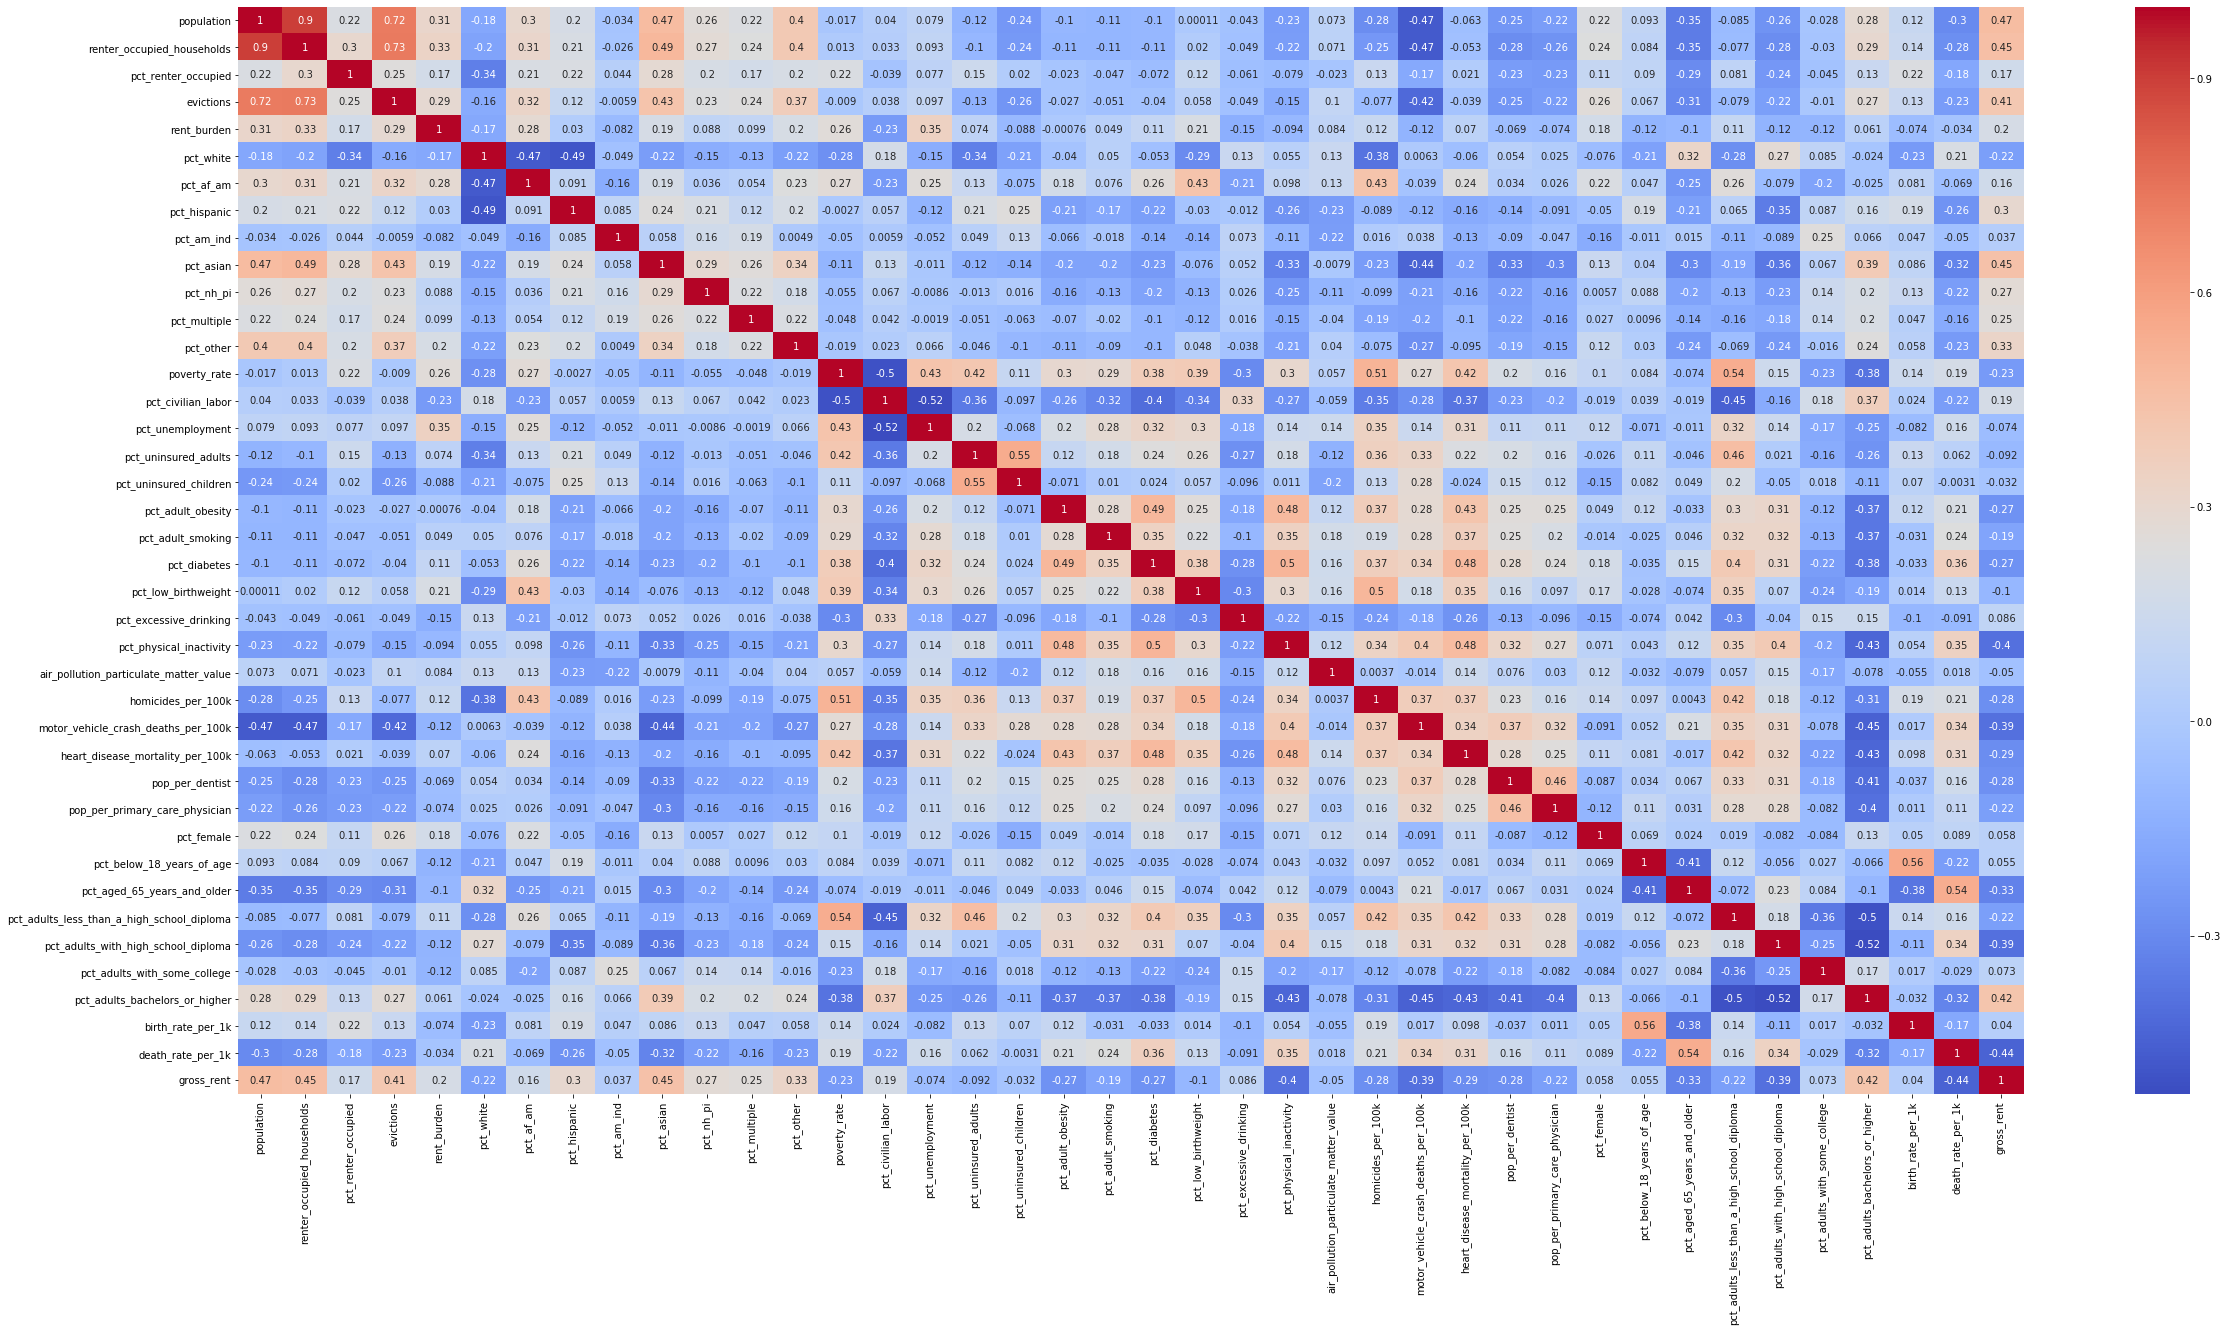

In [15]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='kendall'),annot=True,cmap="coolwarm")
plt.show()

In [16]:
df_numeric.corr(method='spearman')

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
population                                    1.000000                    0.986289             0.319116   0.889176     0.440321  -0.248627   0.433022      0.277123   -0.054126   0.640295   0.358120      0.314790   0.533841     -0.018764            0.042193          0.134082             -0.176032               -0.353788          -0.156646          -0.148840     -0.150446             0.002434               -0.073469                -0.339257                                0.110228           -0.390439                            -0.659621                         -0.089704        -0.359665                       -0.321929    0.326897                   0.135993                    -0.489624                                   -0.114973                            -0.392050                     -0.049758                        0.418087           0.175082          -0.415499    0.638544
renter_occupied_households                    0.986289                    1.000000             0.431299   0.892910     0.464486  -0.283043   0.447017      0.297356   -0.042527   0.662866   0.372746      0.335411   0.538860      0.023388            0.033215          0.151740             -0.148351               -0.348412          -0.160628          -0.145119     -0.155883             0.030079               -0.083422                -0.337118                                0.106848           -0.341242                            -0.659056                         -0.077322        -0.402283                       -0.371829    0.347479                   0.121625                    -0.491928                                   -0.106732                            -0.420037                     -0.050355                        0.432272           0.195296          -0.401962    0.626182
pct_renter_occupied                           0.319116                    0.431299             1.000000   0.363289     0.254403  -0.486722   0.312388      0.328435    0.064992   0.404032   0.273652      0.259289   0.278806      0.322919           -0.057629          0.113795              0.218601                0.031536          -0.036942          -0.067218     -0.107364             0.173599               -0.093083                -0.120105                               -0.033235            0.189359                            -0.251540                          0.029852        -0.331609                       -0.338723    0.158818                   0.129589                    -0.416611                                    0.119287                            -0.352405                     -0.067537                        0.195191           0.326579          -0.260066    0.242295
evictions                                     0.889176                    0.892910             0.363289   1.000000     0.408801  -0.223858   0.440623      0.165838   -0.012254   0.599295   0.314190      0.349274   0.493964     -0.014982            0.046857          0.144451             -0.190908               -0.373117          -0.041637          -0.067307     -0.057254             0.078226               -0.078946                -0.235008                                0.150689           -0.108654      

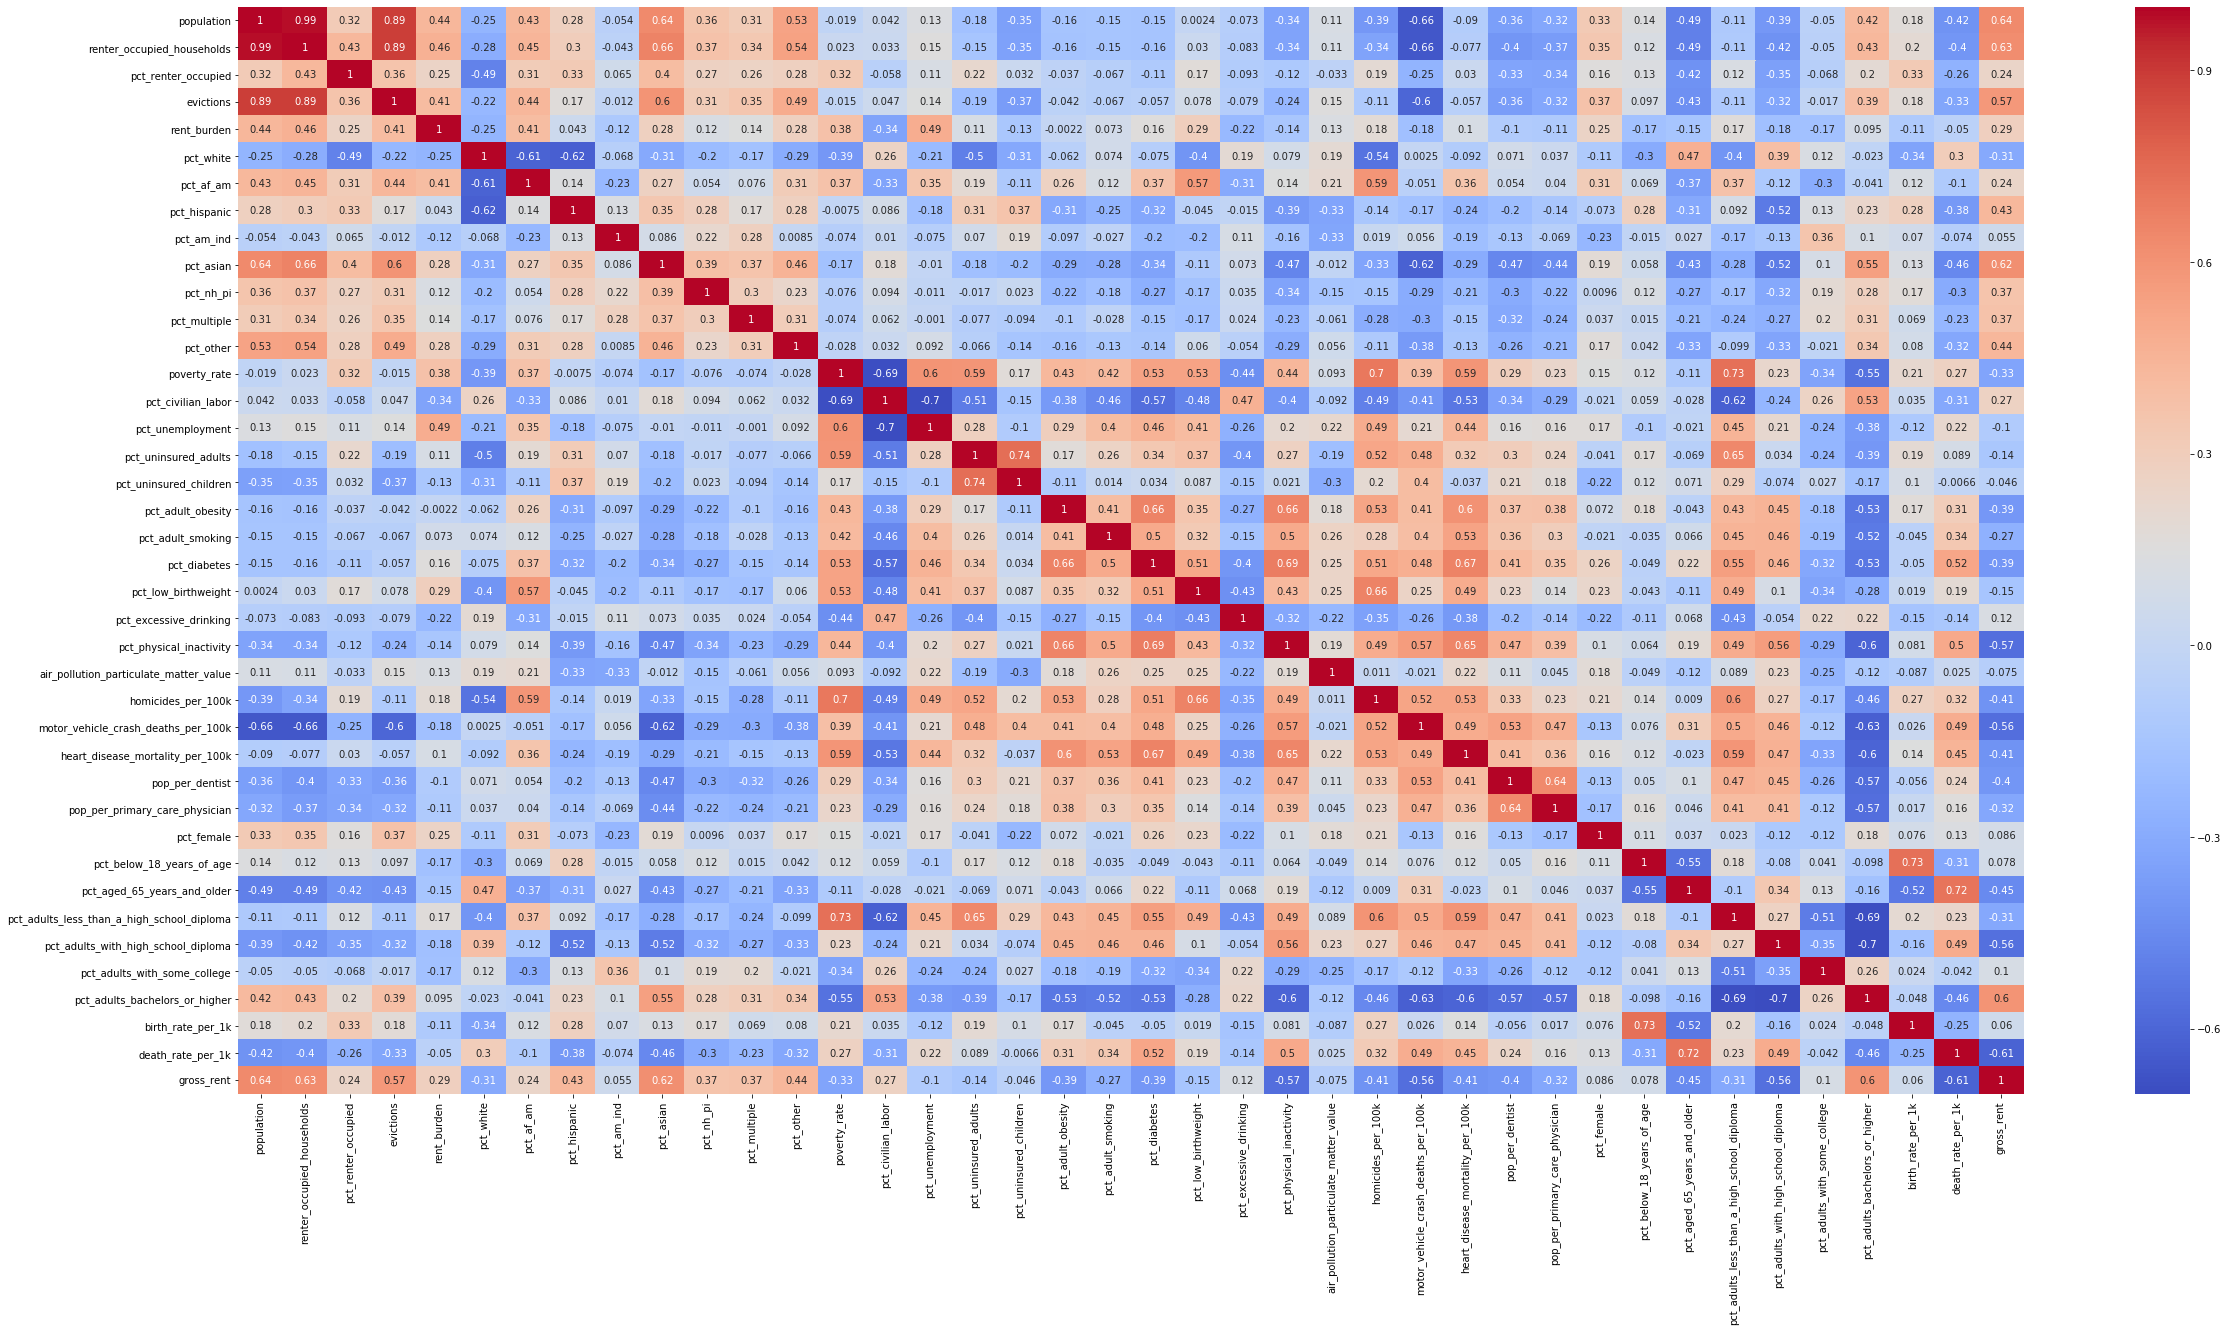

In [17]:
plt.figure(figsize=(40,20))
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,cmap="coolwarm")
plt.show()

**Multicollinearity detected between population, renter_occupied_households,evictions**

#### Based on Spearman heatmap: 
#### gross_rent is +ve correlated to population,  pct_hispanic, pct_asian, pct_nh_pi, pct_multiple, pct_other, pct_adults_bachelors_or_higher

### Plot pairplot for several features vs gross rent

In [18]:
df_numeric_1 = df[['population','renter_occupied_households','pct_renter_occupied','evictions','rent_burden','gross_rent']]

In [19]:
df_numeric_1

population  renter_occupied_households  pct_renter_occupied  evictions  rent_burden  gross_rent
0           3876                         408               24.583        NaN       18.380         577
1          10224                        1166               28.346        3.0       26.694         844
2          27023                        2927               21.641        9.0       31.028         700
3           8735                        1039               23.110        0.0       27.734         592
4           3681                         365               21.985        2.0       19.673         444
5           8540                         751               22.543        0.0       34.937         531
6          22712                        1901               24.602       19.0       29.242         976
7          27974                        3873               38.012       49.0       29.966         725
8           2027                         295               55.572        NaN       21.808         533
9          17165                        2223               29.769        NaN       28.664         531
10        963541                      191320               50.311     6749.0       32.229         806
11          2352                         277               25.940        NaN       21.172         406
12          7218                         823               26.178        3.0       30.468         645
13        244240                       21112               22.737      512.0       31.793         984
14         17882                        1898               25.902        NaN       23.007         931
15        991145                      195220               47.798     4190.0       30.317        1001
16       1218942                      198288               35.131     3434.0       28.559         780
17         87762                       11465               29.449      112.0       32.547         694
18         41839                        3341               20.694      110.0       26.952         674
19         17479                        1801               22.804       12.0       30.329         609
20         33020                        4079               29.231      114.0       27.552         733
21          7816                         970               25.596        5.0       23.751         691
22         10111                         920               21.095        3.0       28.268         578
23       2318272                      465328               56.318        NaN       33.998        1367
24         13429                        1034               18.362       10.0       32.843         497
25        537958                       76931               33.949     3192.0       29.999         744
26         37203                        3480               29.053        NaN       26.682         729
27          4203                         504               27.531        0.0       24.138         490
28         39788                        5457               37.846        NaN       35.006         861
29          9472                         869               22.716        3.0       33.620         523
30         14543                        1961               31.362        NaN       29.772         755
31         10591                         999               26.133        1.0       21.008         596
32          1043                         125               25.425       -1.0       17.492         497
33        167030                       15268               26.631     1469.0       28.706         958
34         29589                        3878               34.542        NaN       29.974         637
35          3302                         276               46.884        NaN       22.064         930
36         60011                        7302               30.503      151.0       28.536         579
37          6179                         593               21.550        1.0       21.684         550
38          7940            

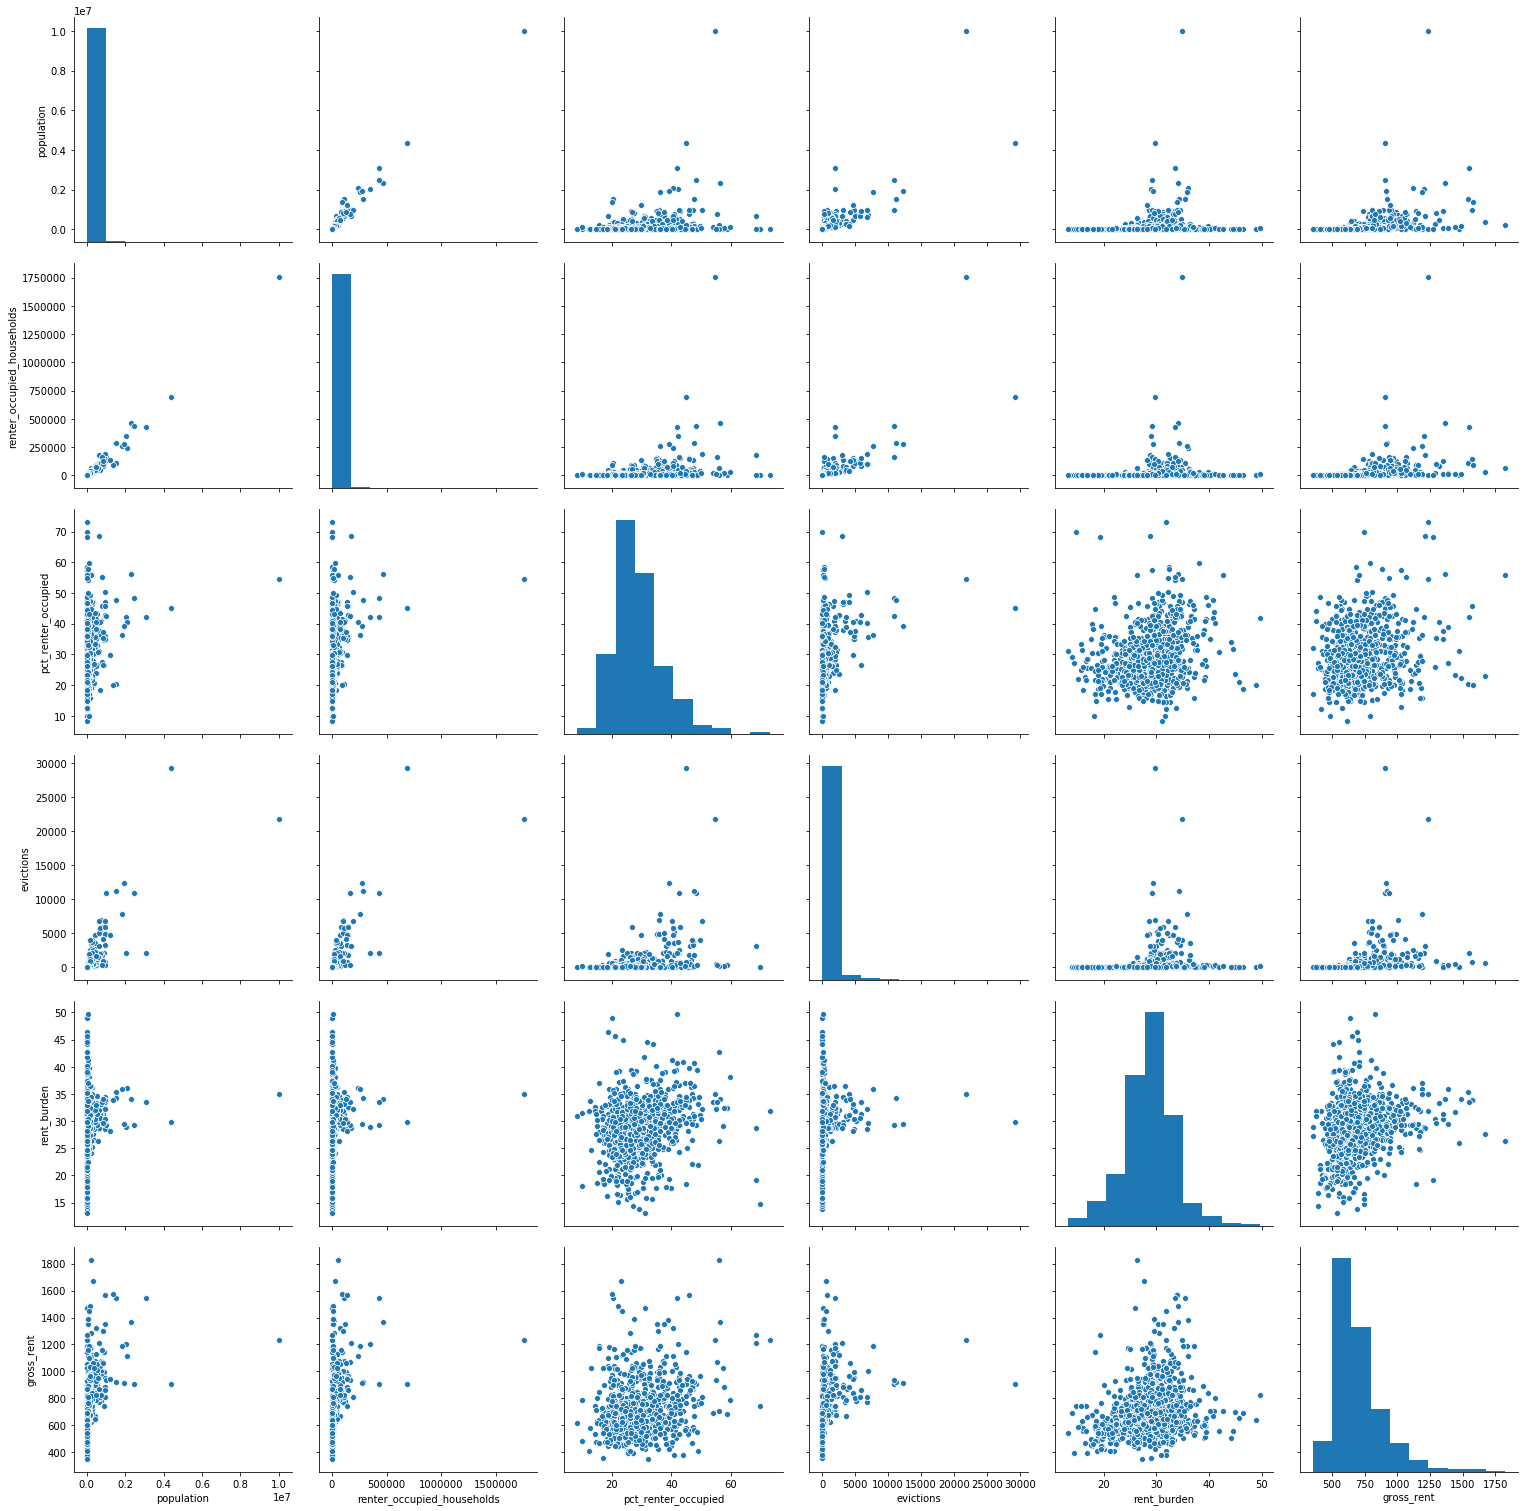

In [20]:
sns.pairplot(df_numeric_1.sample(1000),height=3.5)
plt.show()

In [21]:
df_numeric_2 = df[['pct_white','pct_af_am','pct_hispanic','pct_am_ind','pct_asian','gross_rent']]

In [22]:
df_numeric_2

pct_white  pct_af_am  pct_hispanic  pct_am_ind  pct_asian  gross_rent
0      0.945945   0.010761      0.026038    0.005685   0.005635         577
1      0.808959   0.002284      0.173426    0.001803   0.001493         844
2      0.956621   0.005141      0.013088    0.004728   0.004708         700
3      0.894835   0.000298      0.076576    0.000995   0.004297         592
4      0.923886   0.000496      0.042889    0.000000   0.013622         444
5      0.560637   0.417547      0.000597    0.001294   0.000000         531
6      0.929799   0.005564      0.039416    0.002389   0.005106         976
7      0.537084   0.008489      0.396900    0.017048   0.024534         725
8      0.184899   0.001981      0.010408    0.749382   0.000000         533
9      0.961332   0.009077      0.011856    0.002779   0.000800         531
10     0.528537   0.263288      0.141233    0.004929   0.037376         806
11     0.965858   0.012411      0.003865    0.009410   0.002087         406
12     0.428118   0.058903      0.493401    0.000799   0.000789         645
13     0.795076   0.116306      0.051938    0.003727   0.015258         984
14     0.740954   0.004821      0.160933    0.010101   0.066539         931
15     0.403998   0.435365      0.076757    0.001906   0.062553        1001
16     0.795641   0.129331      0.018422    0.001011   0.032348         780
17     0.939076   0.023189      0.012896    0.001699   0.011118         694
18     0.848957   0.065177      0.063747    0.003498   0.004108         674
19     0.968958   0.005248      0.011064    0.001773   0.003496         609
20     0.609131   0.286307      0.087616    0.003960   0.001386         733
21     0.943272   0.006122      0.029872    0.004868   0.000498         691
22     0.908087   0.004633      0.041007    0.023878   0.005917         578
23     0.263296   0.174250      0.279477    0.002200   0.239974        1367
24     0.557809   0.430677      0.003592    0.000100   0.000000         497
25     0.787563   0.140932      0.018354    0.001880   0.025357         744
26     0.515341   0.019518      0.317654    0.130309   0.006405         729
27     0.855246   0.000000      0.020993    0.095354   0.000000         490
28     0.546908   0.370487      0.045009    0.001688   0.014177         861
29     0.959306   0.001699      0.015694    0.001391   0.000000         523
30     0.531483   0.017299      0.420244    0.010371   0.006828         755
31     0.539935   0.016090      0.432575    0.001004   0.001406         596
32     0.971436   0.000000      0.005725    0.020921   0.000000         497
33     0.682910   0.234982      0.049866    0.000797   0.013253         958
34     0.863403   0.069114      0.030669    0.000403   0.008118         637
35     0.149208   0.091357      0.121381    0.291100   0.304265         930
36     0.959407   0.008651      0.014182    0.002691   0.005631         579
37     0.917266   0.003980      0.064671    0.003481   0.002573         550
38     0.537051   0.408917      0.028215    0.000403   0.022611         521
39     0.863019   0.087378      0.022537    0.002970   0.004390         479
40     0.436677   0.526178      0.021614    0.000000   0.005204         558
41     0.619152   0.087421      0.190064    0.002822   0.072389         991
42     0.462512   0.499850      0.013576    0.003489   0.000299         617
43     0.962002   0.003673      0.018754    0.005889   0.006977         531
44     0.897301   0.006670      0.066773    0.000101   0.011167         641
45     0.453681   0.354120      0.107026    0.013342   0.023750         869
46     0.334105   0.621763      0.012385    0.000000   0.020958         592
47     0.606657   0.275855      0.058859    0.000800   0.024622         728
48     0.977550   0.001515      0.006817    0.000404   0.005706         519
49     0.767726   0.142226      0.053917    0.003831   0.013554         907
50     0.877104   0.031369      0.065694    0.001503   0.004978         489
51     0.884327   0.026129      0.062997    0.003202  

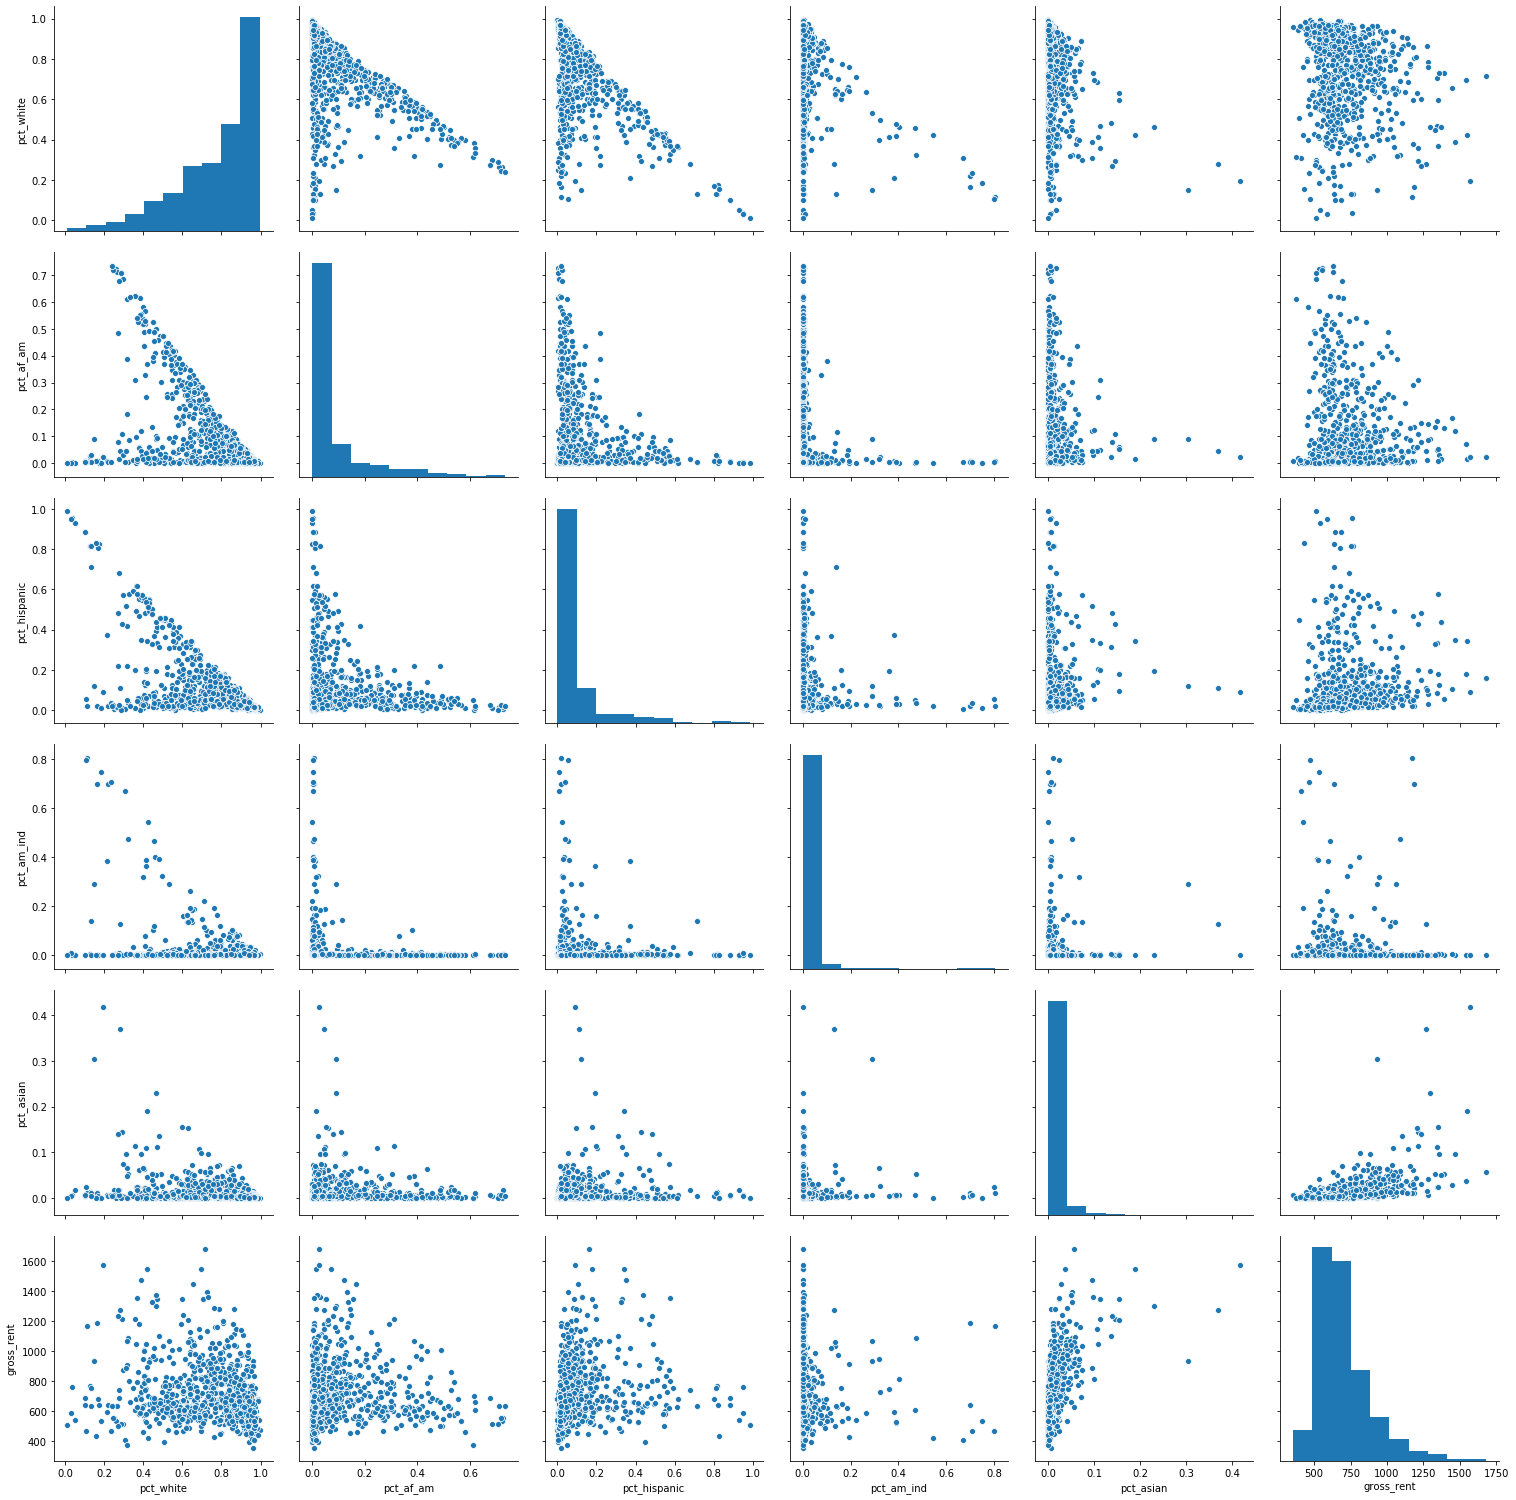

In [23]:
sns.pairplot(df_numeric_2.sample(1000),height=3.5)
plt.show()

In [24]:
df_numeric_3 = df[['pct_nh_pi','pct_multiple','pct_other','poverty_rate','pct_civilian_labor','gross_rent']]

In [25]:
df_numeric_3.head()

pct_nh_pi  pct_multiple  pct_other  poverty_rate  pct_civilian_labor  gross_rent
0        0.0      0.005935   0.000000         4.172               0.550         577
1        0.0      0.012033   0.000000         7.714               0.545         844
2        0.0      0.014809   0.000905         9.789               0.508         700
3        0.0      0.022999   0.000000        13.735               0.545         592
4        0.0      0.016905   0.002202         8.217               0.474         444

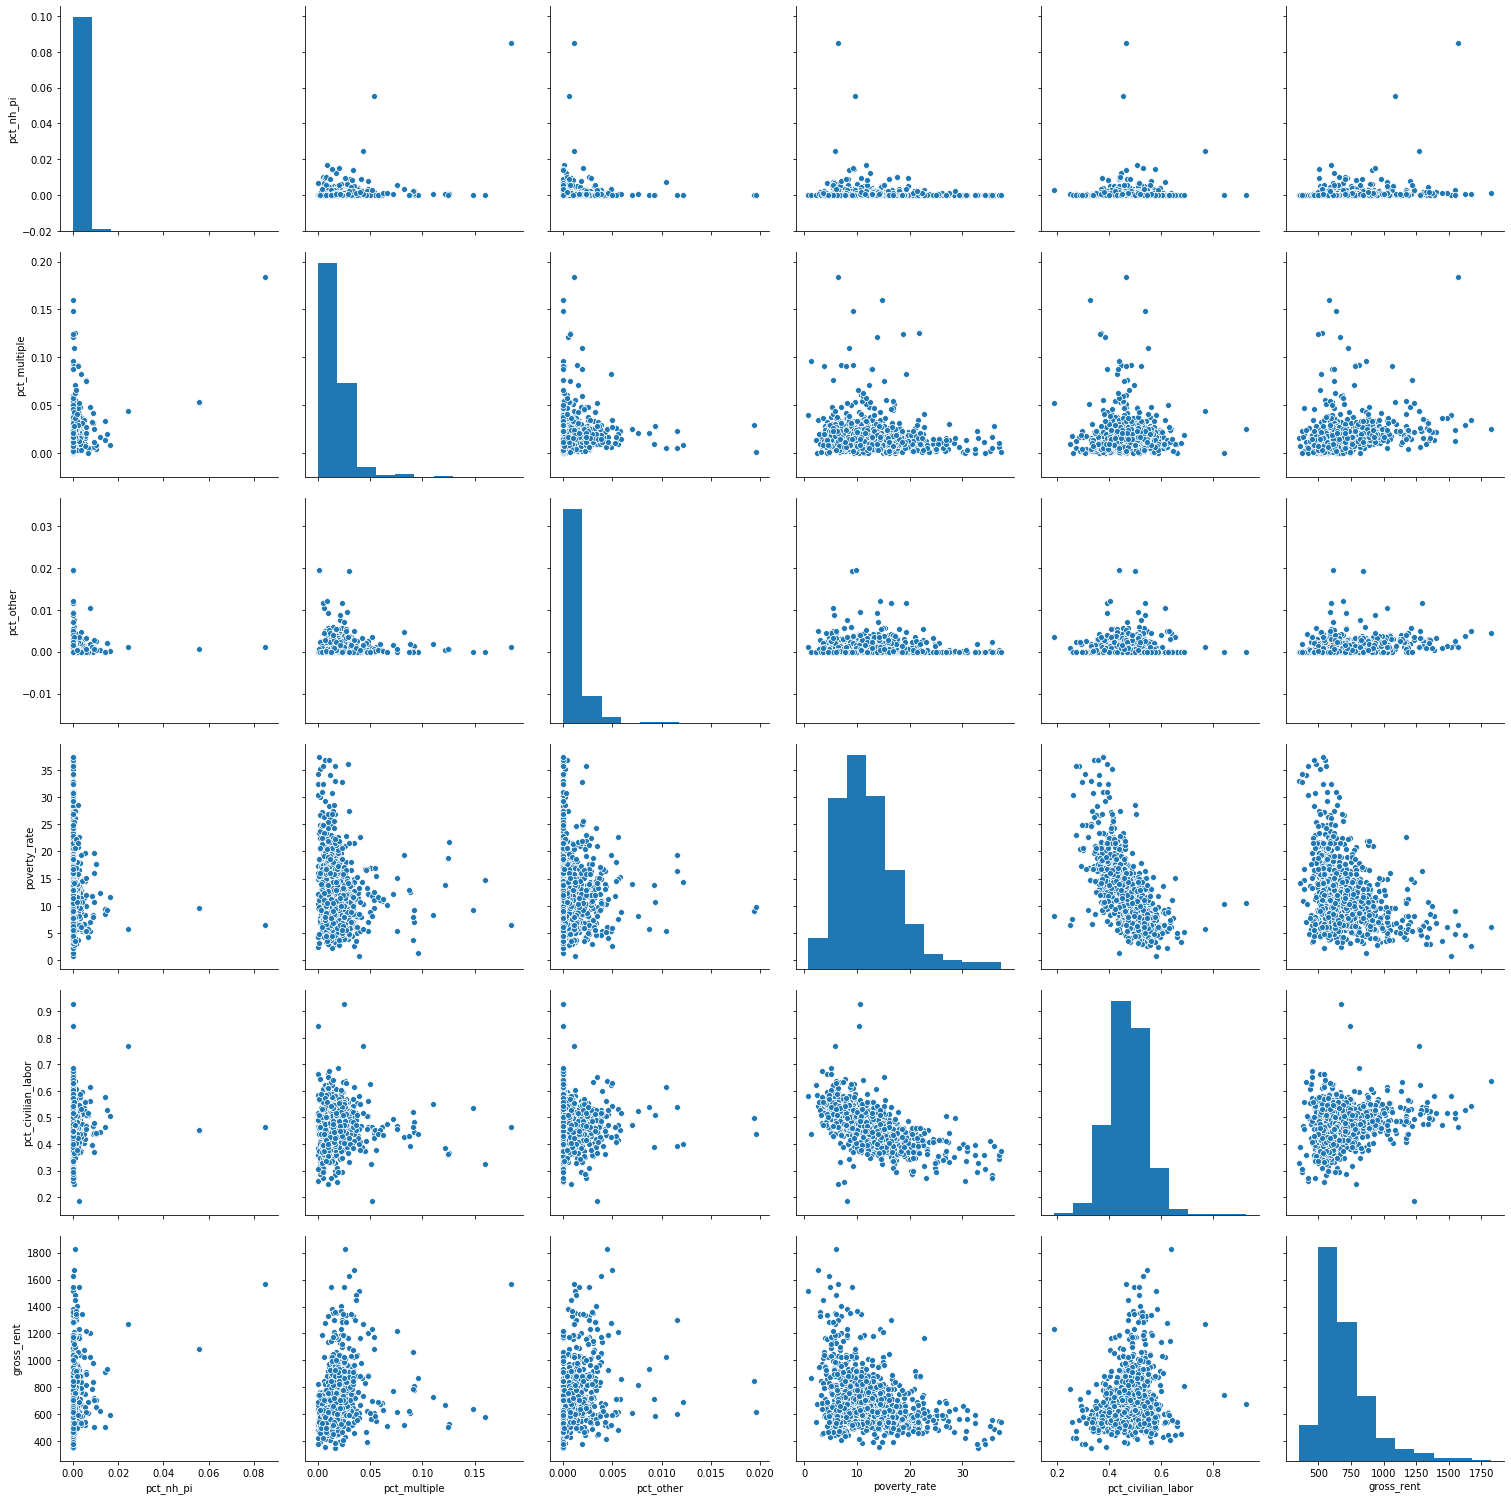

In [26]:
sns.pairplot(df_numeric_3.sample(1000),height=3.5)
plt.show()

In [27]:
df_numeric_4 = df[['pct_unemployment','pct_uninsured_adults','pct_uninsured_children','pct_adult_obesity','pct_adult_smoking','gross_rent']]

In [28]:
df_numeric_4.head()

pct_unemployment  pct_uninsured_adults  pct_uninsured_children  pct_adult_obesity  pct_adult_smoking  gross_rent
0             0.023                 0.107                   0.062              0.310              0.166         577
1             0.040                 0.324                   0.201              0.253              0.102         844
2             0.063                 0.129                   0.032              0.296              0.215         700
3             0.038                 0.207                   0.084              0.255              0.182         592
4             0.034                 0.177                   0.075              0.324              0.118         444

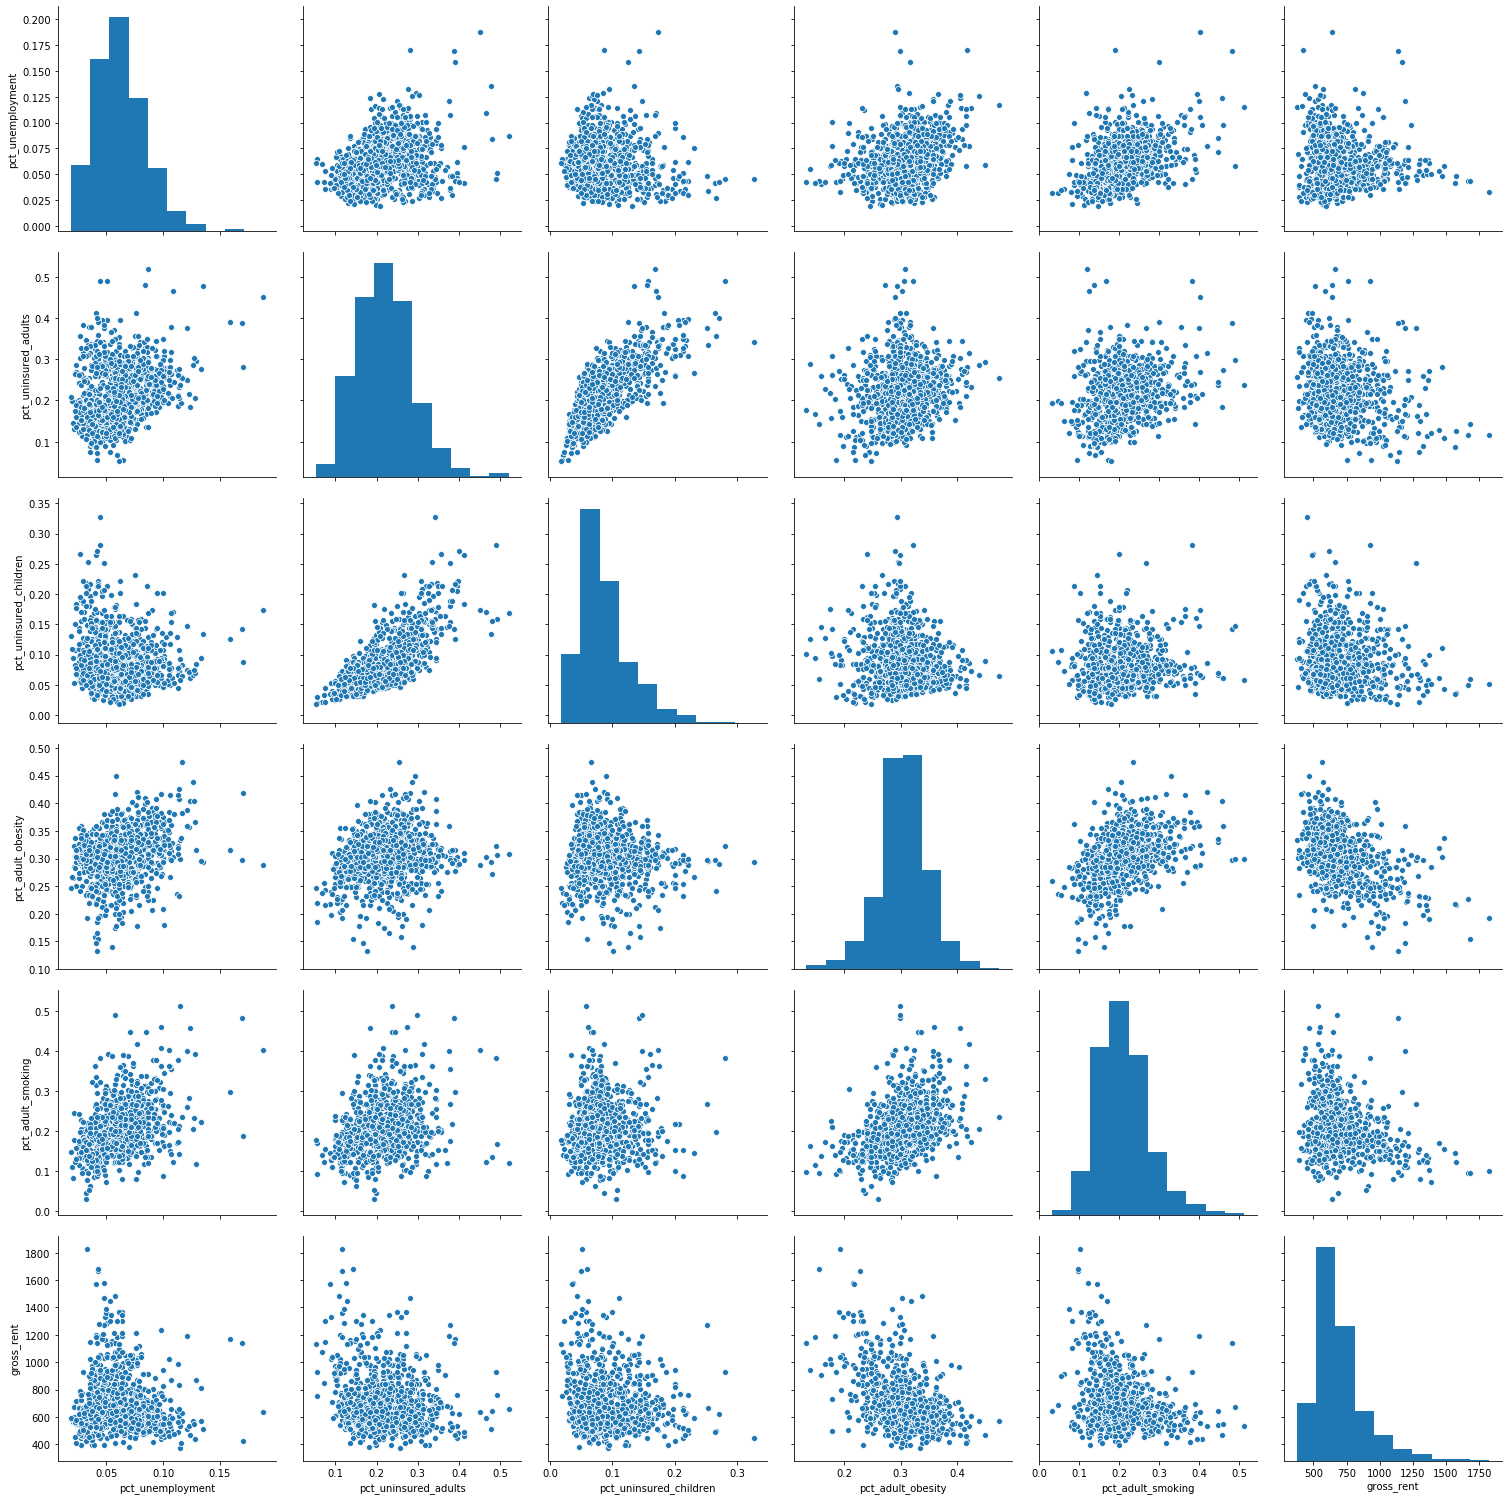

In [29]:
sns.pairplot(df_numeric_4.sample(1000),height=3.5)
plt.show()

In [30]:
df_numeric_5 = df[['pct_diabetes','pct_low_birthweight','pct_excessive_drinking','pct_physical_inactivity','air_pollution_particulate_matter_value','gross_rent']]

In [31]:
df_numeric_5.head()

pct_diabetes  pct_low_birthweight  pct_excessive_drinking  pct_physical_inactivity  air_pollution_particulate_matter_value  gross_rent
0         0.100                  NaN                   0.262                    0.342                               11.022908         577
1         0.066                0.070                   0.200                    0.148                                9.904099         844
2         0.087                0.070                   0.187                    0.258                               11.011502         700
3         0.104                0.081                   0.169                    0.274                               12.845770         592
4         0.113                  NaN                   0.178                    0.340                               11.565750         444

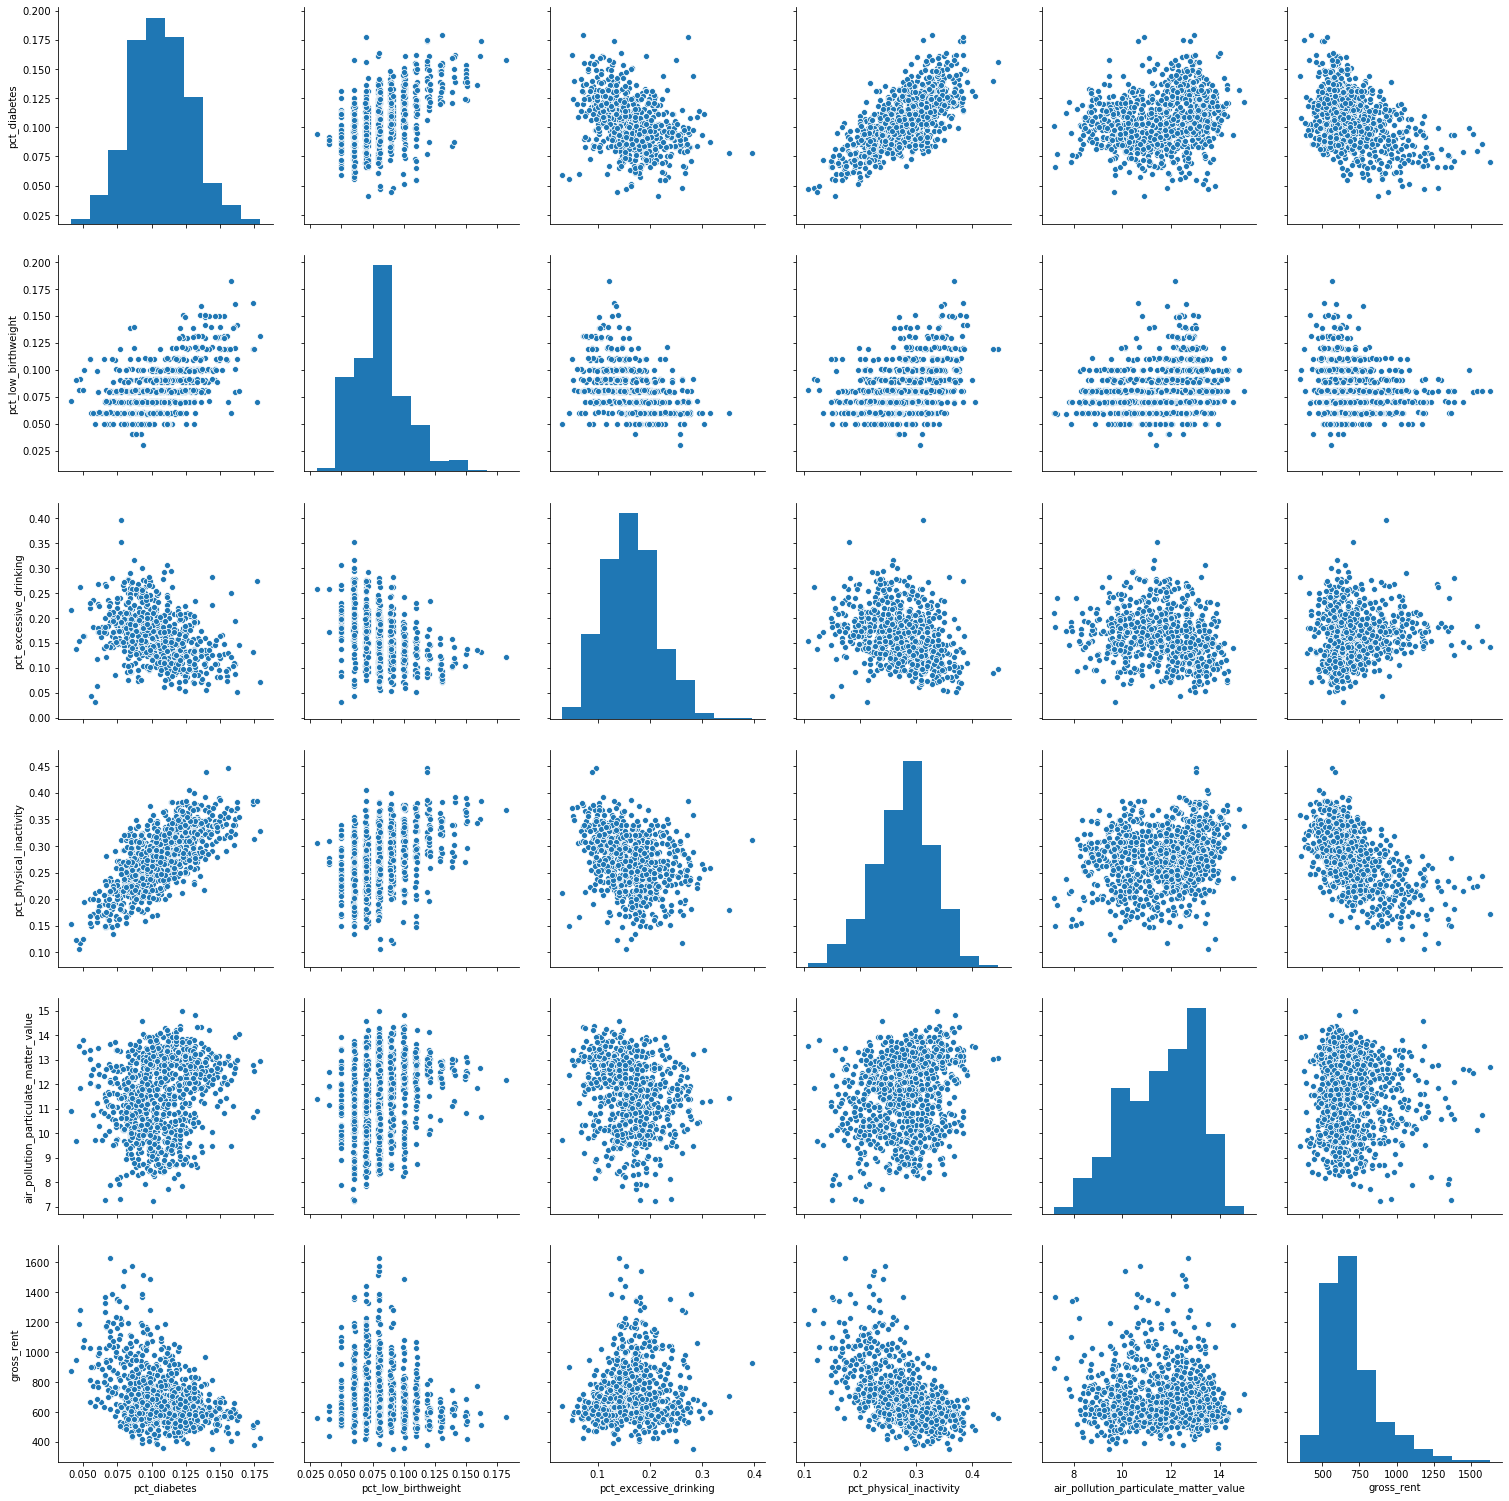

In [32]:
sns.pairplot(df_numeric_5.sample(1000),height=3.5)
plt.show()

In [33]:
df_numeric_6 = df[['homicides_per_100k','motor_vehicle_crash_deaths_per_100k','heart_disease_mortality_per_100k','pop_per_dentist','pop_per_primary_care_physician','gross_rent']]

In [34]:
df_numeric_6.head()

homicides_per_100k  motor_vehicle_crash_deaths_per_100k  heart_disease_mortality_per_100k  pop_per_dentist  pop_per_primary_care_physician  gross_rent
0                 NaN                                  NaN                               217              NaN                             NaN         577
1                 NaN                                18.26                               181           2009.0                          1690.0         844
2                 NaN                                19.94                               234           4650.0                          1350.0         700
3                 NaN                                30.31                               231           4420.0                          1749.0         592
4                 NaN                                  NaN                               270              NaN                          1249.0         444

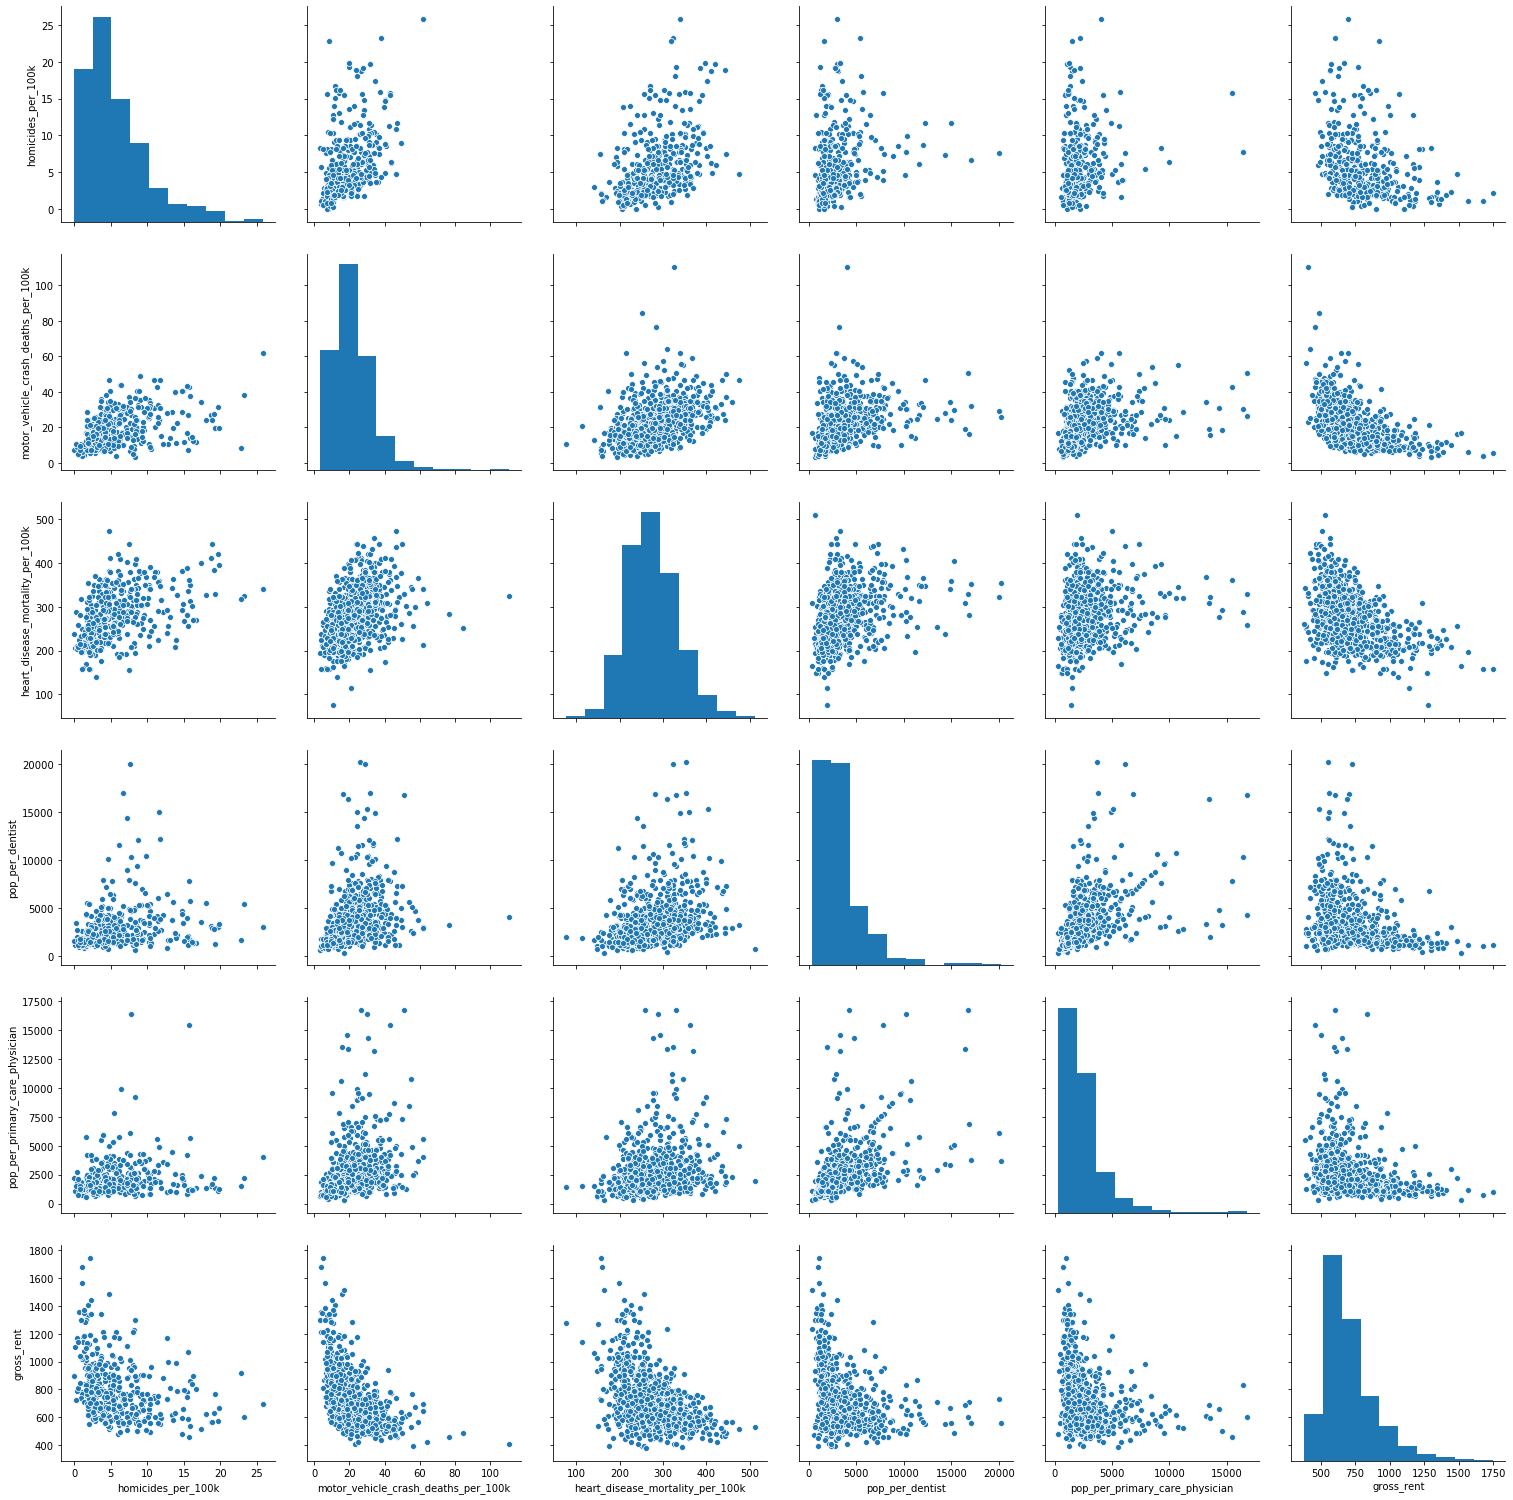

In [35]:
sns.pairplot(df_numeric_6.sample(1000),height=3.5)
plt.show()

In [36]:
df_numeric_7 = df[['pct_female','pct_below_18_years_of_age','pct_aged_65_years_and_older','pct_adults_less_than_a_high_school_diploma','pct_adults_with_high_school_diploma','gross_rent']]

In [37]:
df_numeric_7.head()

pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  pct_adults_less_than_a_high_school_diploma  pct_adults_with_high_school_diploma  gross_rent
0       0.471                      0.218                        0.190                                    0.083250                             0.327984         577
1       0.472                      0.290                        0.077                                    0.099099                             0.202202         844
2       0.496                      0.208                        0.192                                    0.137725                             0.387226         700
3       0.503                      0.193                        0.215                                    0.077154                             0.308617         592
4       0.516                      0.222                        0.230                                    0.092537                             0.362189         444

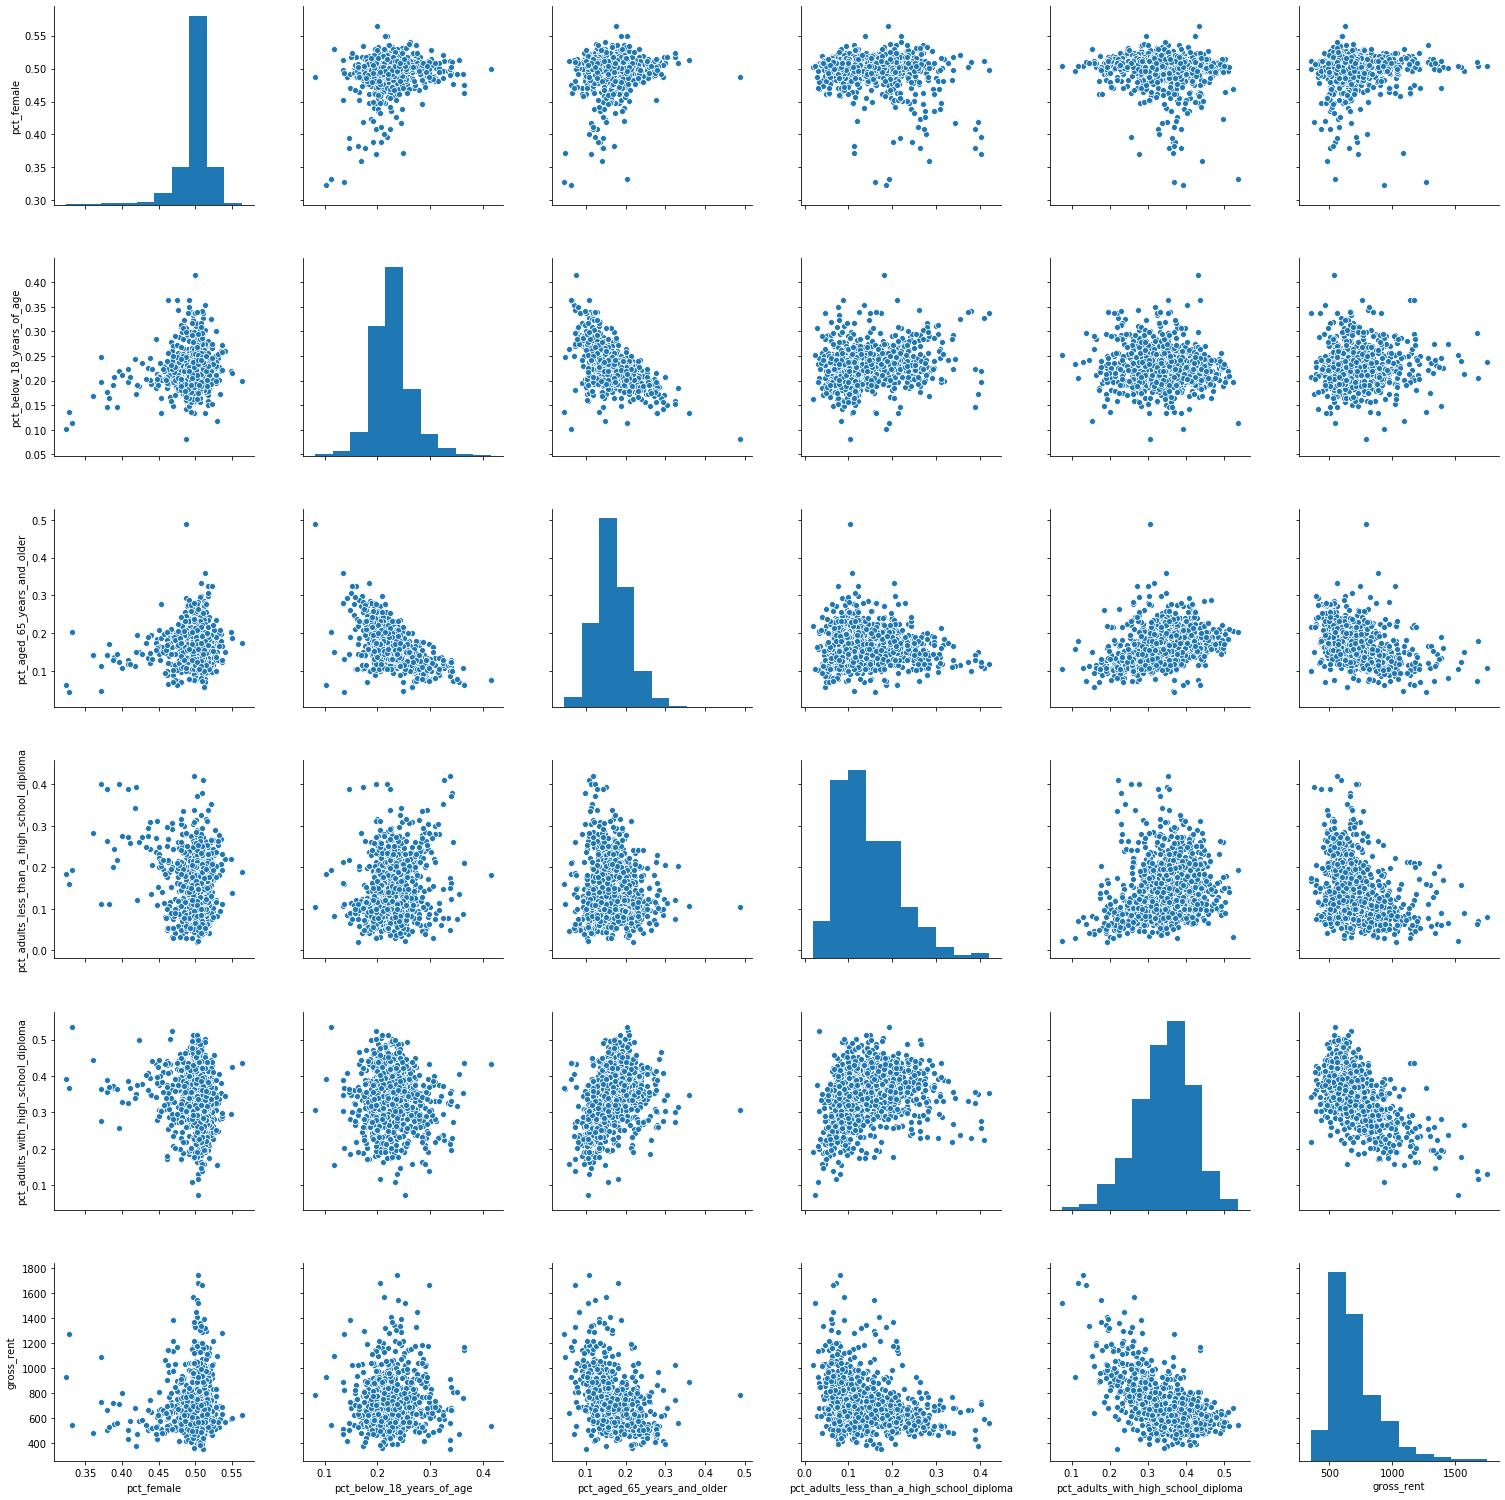

In [38]:
sns.pairplot(df_numeric_7.sample(1000),height=3.5)
plt.show()

In [39]:
df_numeric_8 = df[['pct_adults_with_some_college','pct_adults_bachelors_or_higher','birth_rate_per_1k','death_rate_per_1k','gross_rent']]

In [40]:
df_numeric_8.head()

pct_adults_with_some_college  pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  gross_rent
0                      0.389168                        0.199599          10.008982           9.752342         577
1                      0.302302                        0.396396          14.482893           3.013219         844
2                      0.255489                        0.219561           9.620346          10.873572         700
3                      0.398798                        0.215431           9.383225          10.870809         592
4                      0.346269                        0.199005           9.543286          14.723926         444

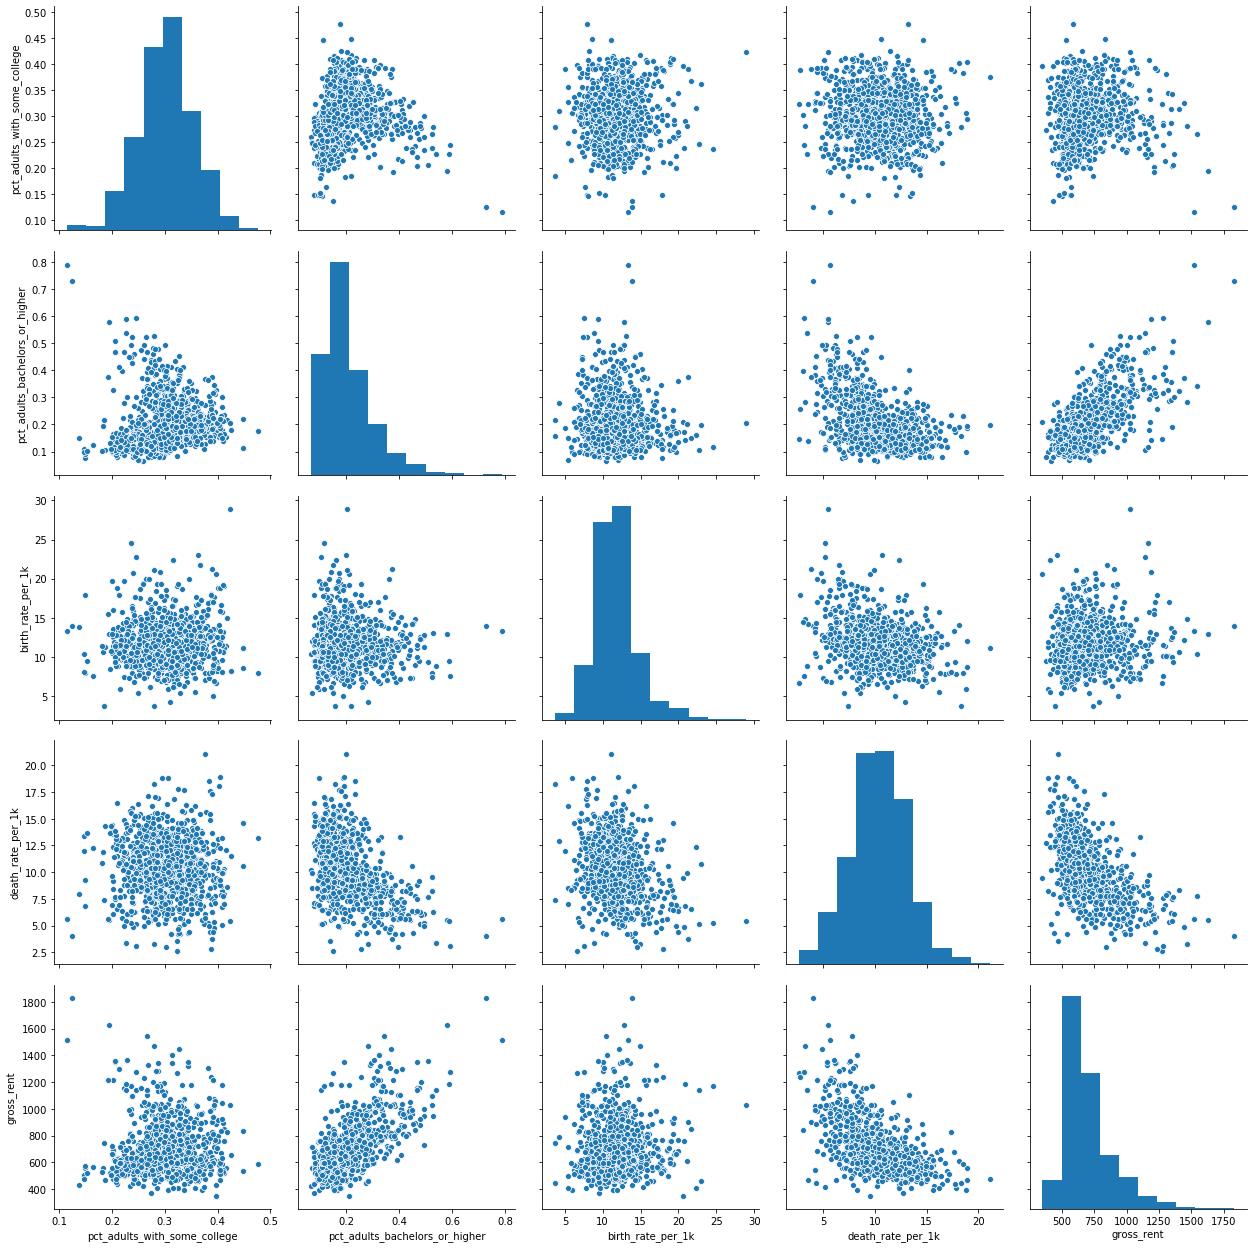

In [41]:
sns.pairplot(df_numeric_8.sample(1000),height=3.5)
plt.show()

### Analyse the categorical features

In [42]:
df_cat = df[['county_code','state','rucc','urban_influence','economic_typology','gross_rent']]

In [43]:
df_cat.head()

county_code    state                                               rucc                                    urban_influence        economic_typology  gross_rent
0     8e686a7  fb8cab1  Nonmetro - Completely rural or less than 2,500...  Noncore adjacent to micro area and does not co...  Manufacturing-dependent         577
1     d1b5fc5  842bd12  Nonmetro - Completely rural or less than 2,500...          Micropolitan not adjacent to a metro area               Recreation         844
2     19a463b  2b7da97  Nonmetro - Urban population of 2,500 to 19,999...  Noncore not adjacent to a metro/micro area and...               Recreation         700
3     1711ab7  5029ed4  Nonmetro - Urban population of 2,500 to 19,999...  Noncore not adjacent to a metro/micro area and...           Nonspecialized         592
4     1eb4681  b795815  Nonmetro - Completely rural or less than 2,500...  Noncore adjacent to micro area and does not co...           Farm-dependent         444

In [44]:
df['county_code'].value_counts()

77caba3     1
a310b65     1
5de59e3     1
6526e9f     1
abf4919     1
c5dd047     1
3c4db81     1
431808f     1
f136239     1
294c84f     1
baeffbb     1
e4ab39b     1
8e9f18b     1
2279f11     1
0d5802b     1
2bfc209     1
7b5c97b     1
dcade95     1
38fd625     1
72ef953     1
e9edd9d     1
f2cd5ad     1
c40decd     1
769f539     1
dc0571b     1
a1bf7f3     1
37d2bb7     1
66faae3     1
3be87d9     1
558cad5     1
3a17925     1
b9b919f     1
6f4cd71     1
e1fa62d     1
9cc10dd     1
d5b0571     1
802cc0d     1
1ef98e1     1
73bc43d     1
b72bfdf     1
1fbbc05     1
4e857e9     1
85c7725     1
29ef71f     1
cbea291     1
9084643     1
a1ac313     1
c2b0f2b     1
68655c5     1
e968c93     1
9e8cfd7     1
15baecf     1
adc87ab     1
1eb4681     1
6df35c1     1
3415d3f     1
f187c0f     1
3cf2bc5     1
08ced25     1
50f2e9b     1
67a5c01     1
6ce63f5     1
9d51517     1
7e4b5ad     1
f62fc23     1
da71b3f     1
ae92275     1
e0c15a7     1
bf2311b     1
b6874f1     1
9db9d6f     1
c280f0

In [45]:
df['county_code'].nunique()

1562

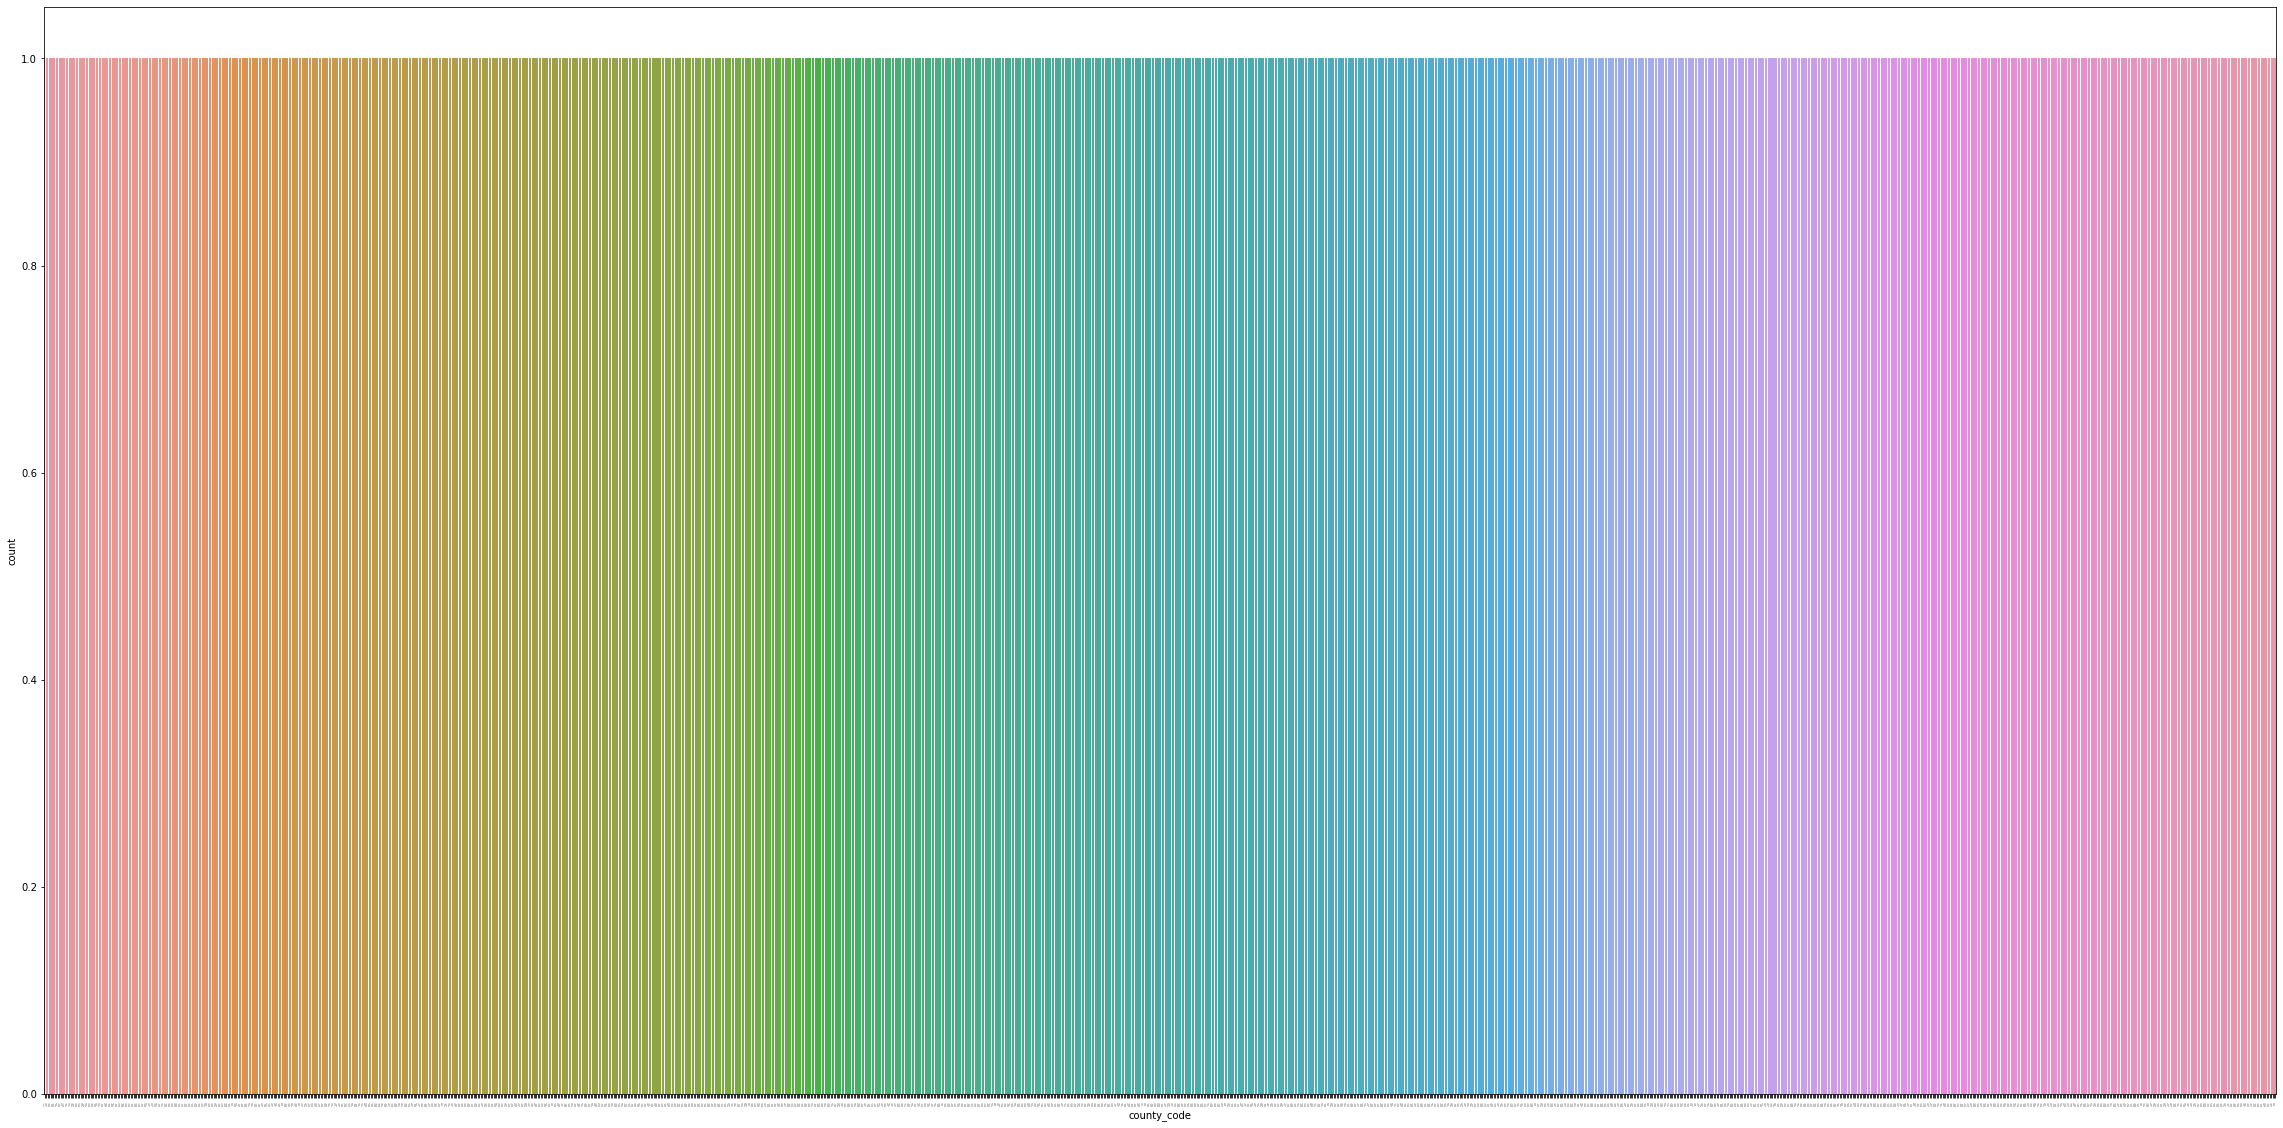

In [46]:
plt.figure(figsize=(40,20))
sns.countplot(x='county_code',data=df_cat)
plt.tick_params(axis='x',which='major',labelsize=1)
plt.xticks(rotation=90)
plt.show()

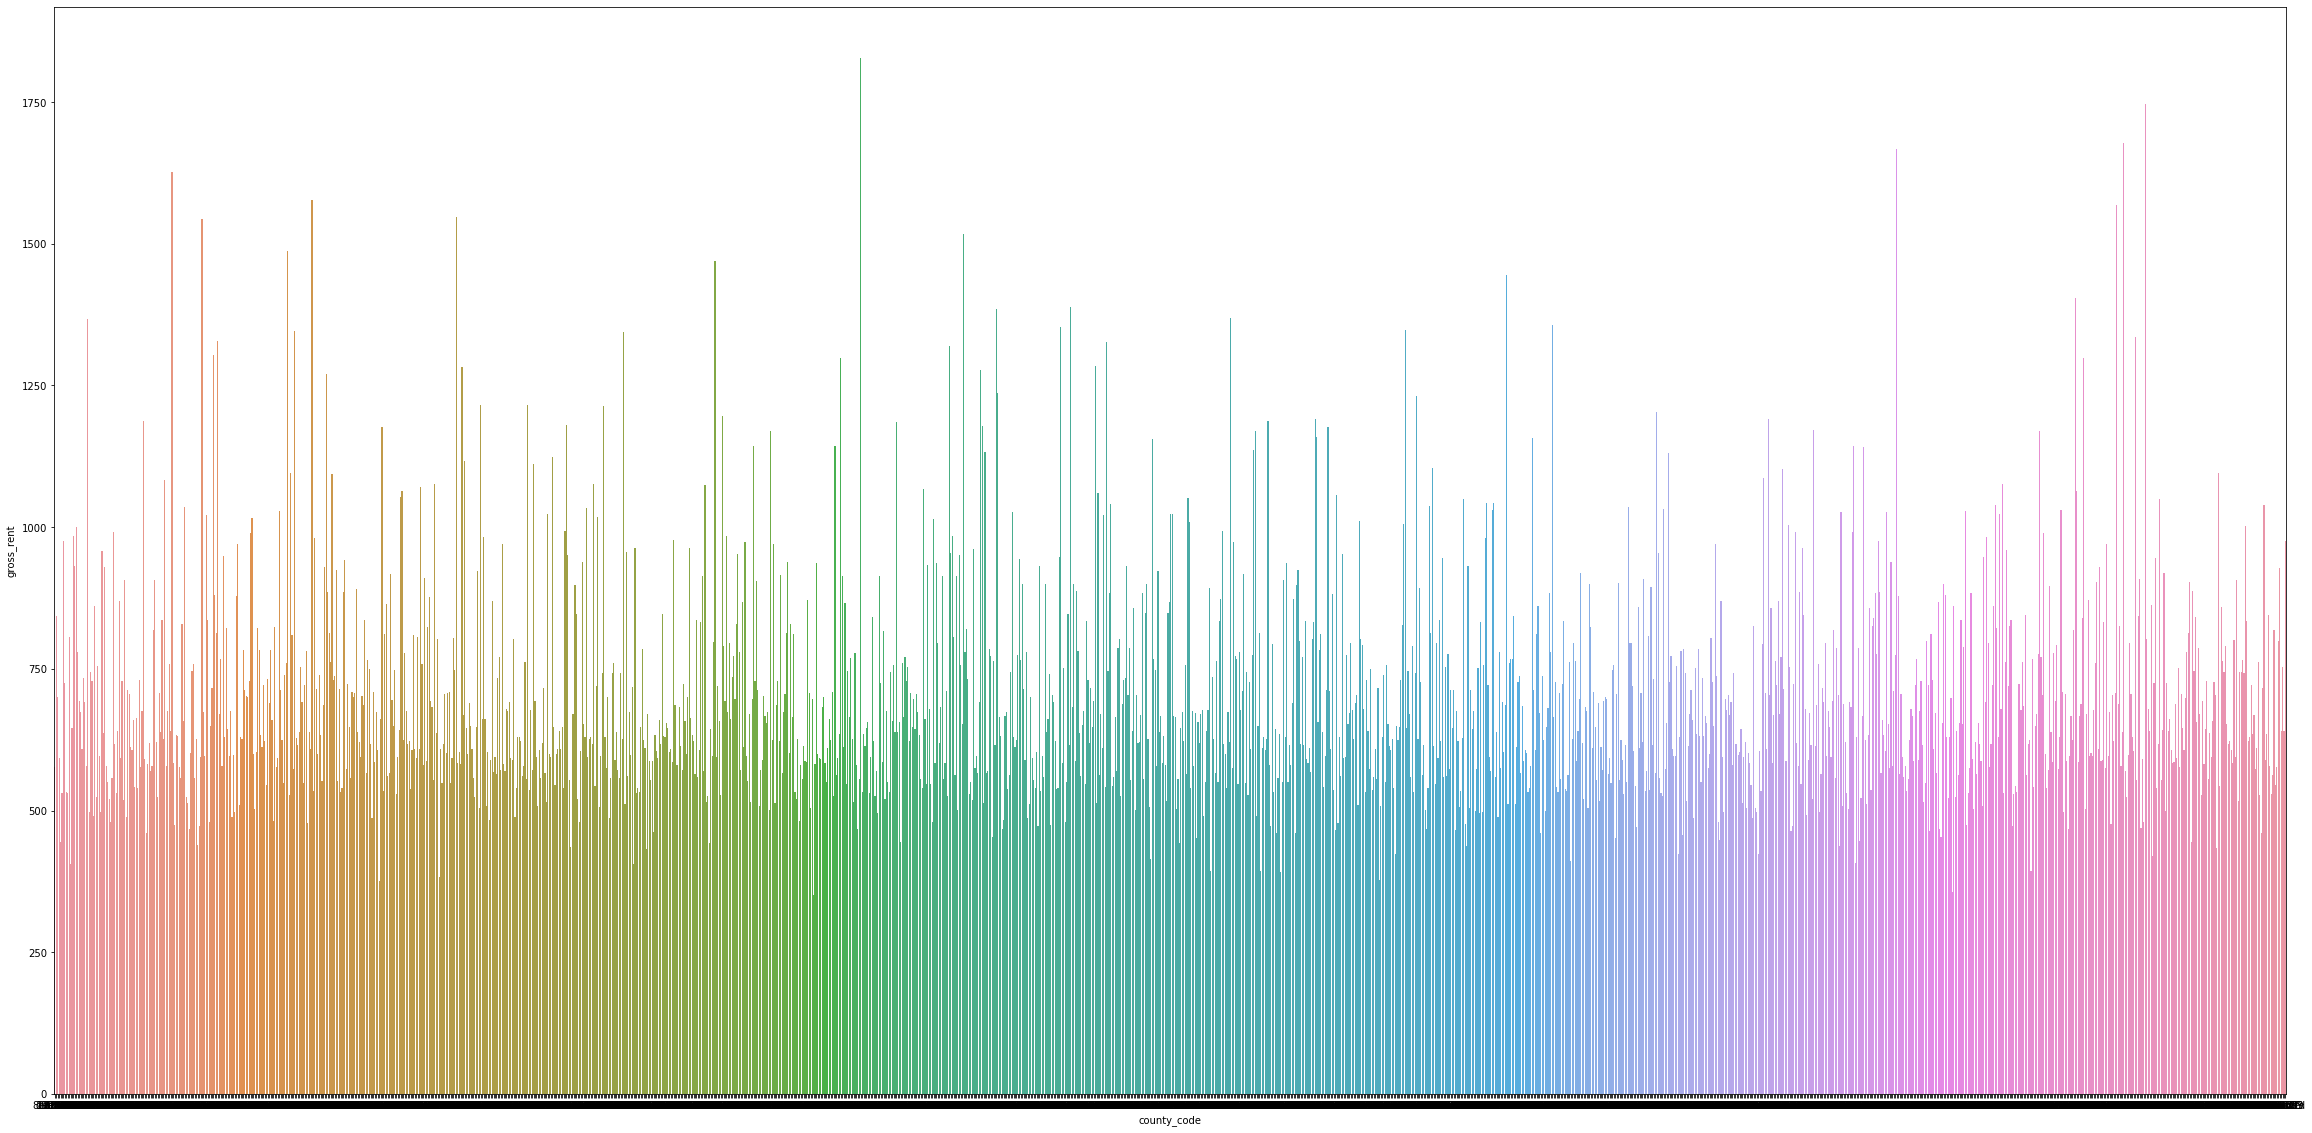

In [47]:
plt.figure(figsize=(40,20))
sns.barplot(x='county_code',y=df_cat.gross_rent,data=df_cat)
plt.show()

In [48]:
df['state'].value_counts()

1b0d913    131
4522abc     93
a952566     69
528ea9f     57
c479f0c     56
20d32fc     56
08f8fb4     54
dc9ae72     50
09d8cd0     47
9d1e27d     47
b795815     45
e2f94fa     44
0f8930b     44
7572db1     40
9dda412     39
9d0874a     39
158df01     38
1dcfd4e     37
e74aca3     36
8036085     35
c3dbf0a     34
78e8330     33
9e0007d     33
4c72956     31
52acab4     31
e899d7f     31
fb8cab1     30
5086a32     28
1646cf6     27
842bd12     26
485e9af     25
698ab34     21
4cd9667     20
3745933     19
7dd3518     18
176f5f0     16
64ffe5d     15
d233cec     10
5029ed4      8
bc77872      7
dfc21f3      6
3337bbb      6
b44cfe6      6
2b7da97      6
fa605d5      6
105e445      4
6d287d7      4
375d4d3      2
9e065a4      1
914c15f      1
Name: state, dtype: int64

In [49]:
df['state'].nunique()

50

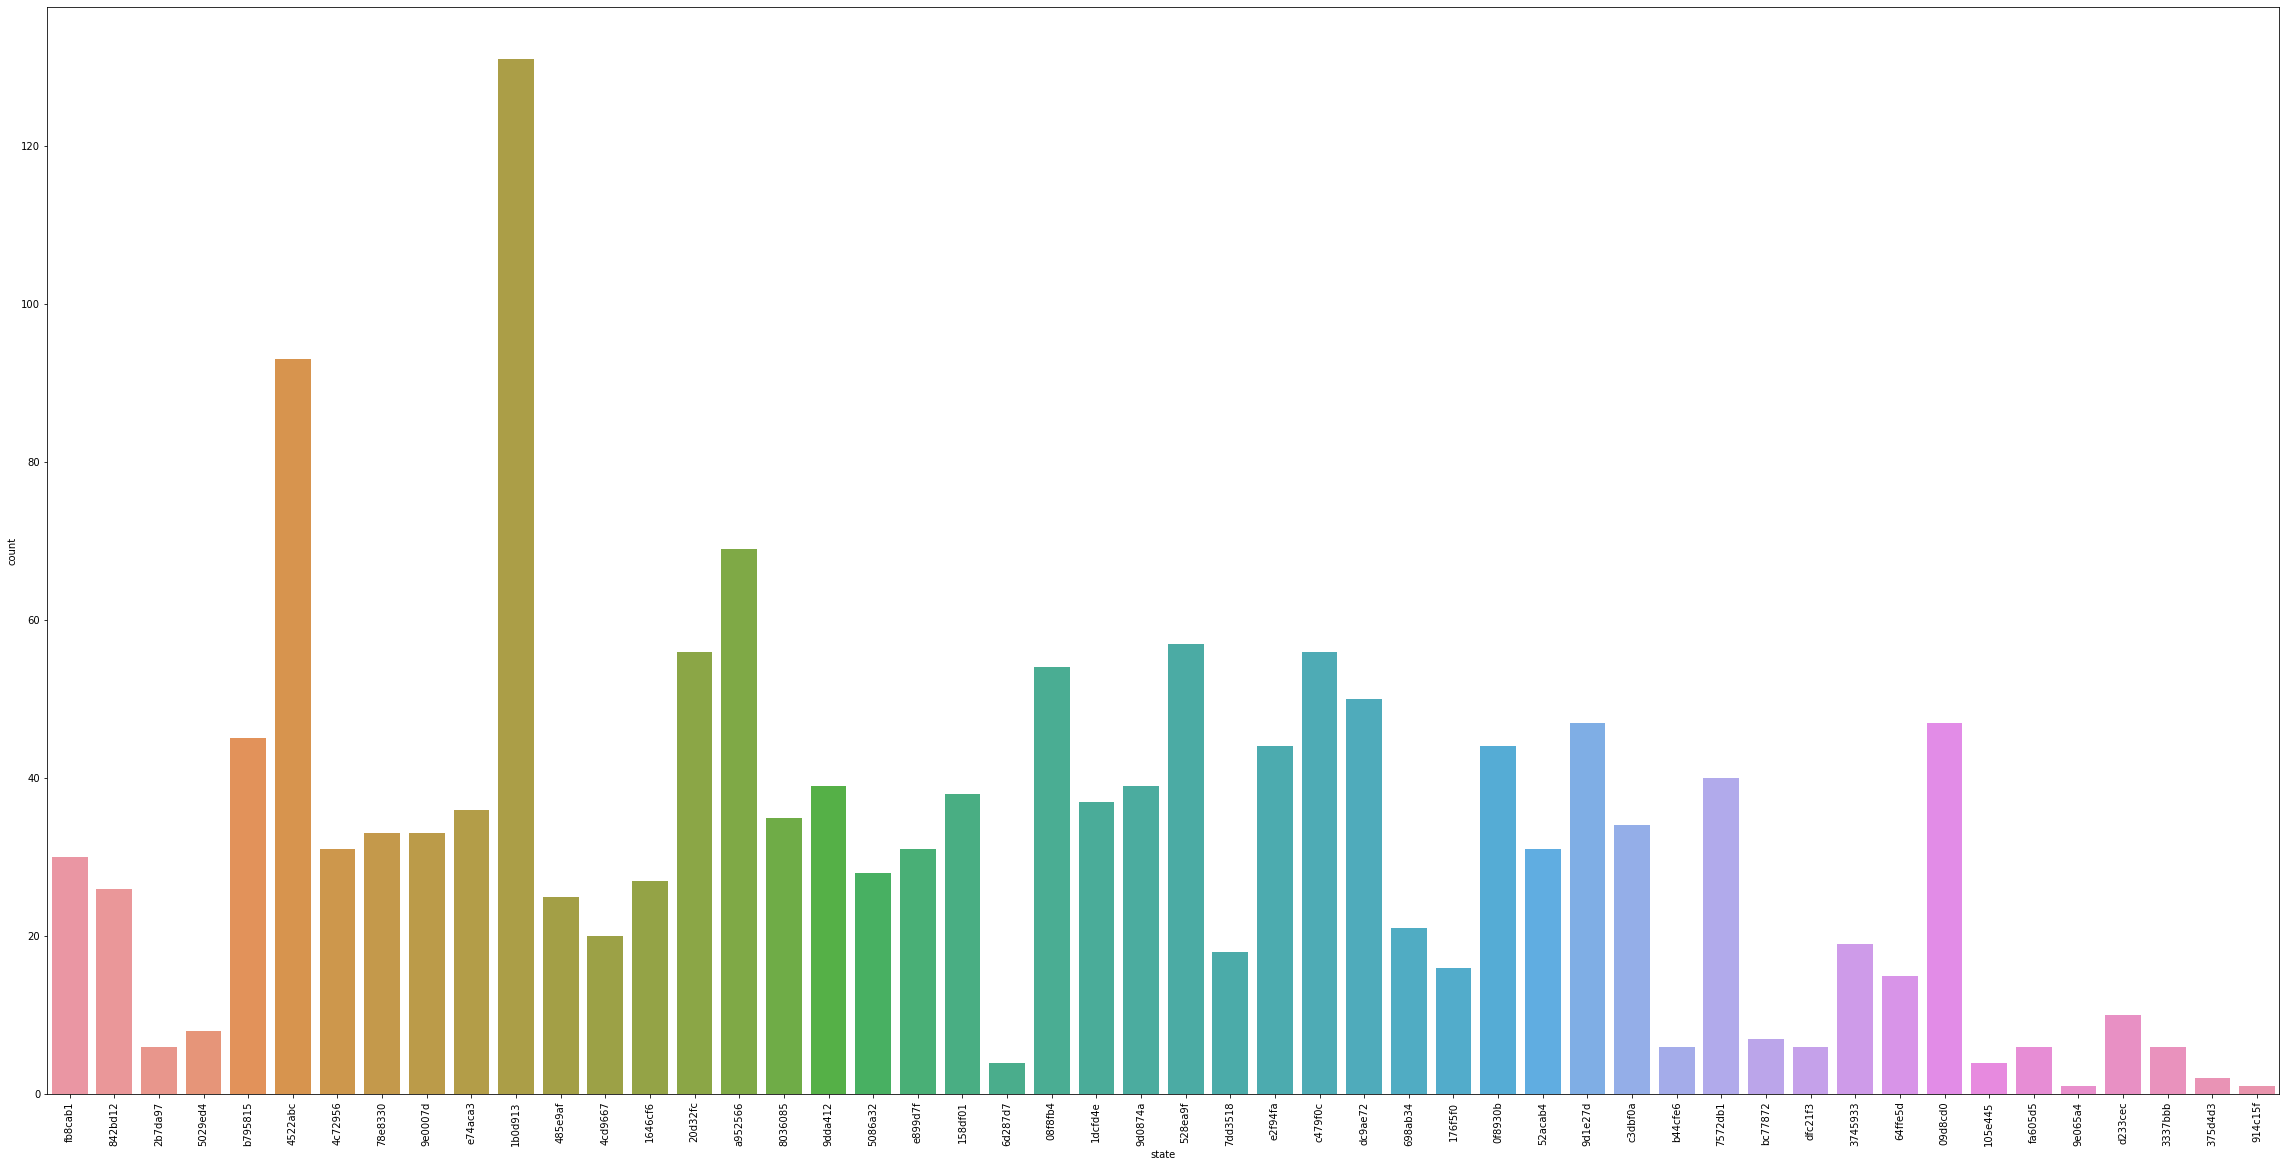

In [50]:
plt.figure(figsize=(40,20))
sns.countplot(x='state',data=df_cat)
plt.xticks(rotation=90)
plt.show()

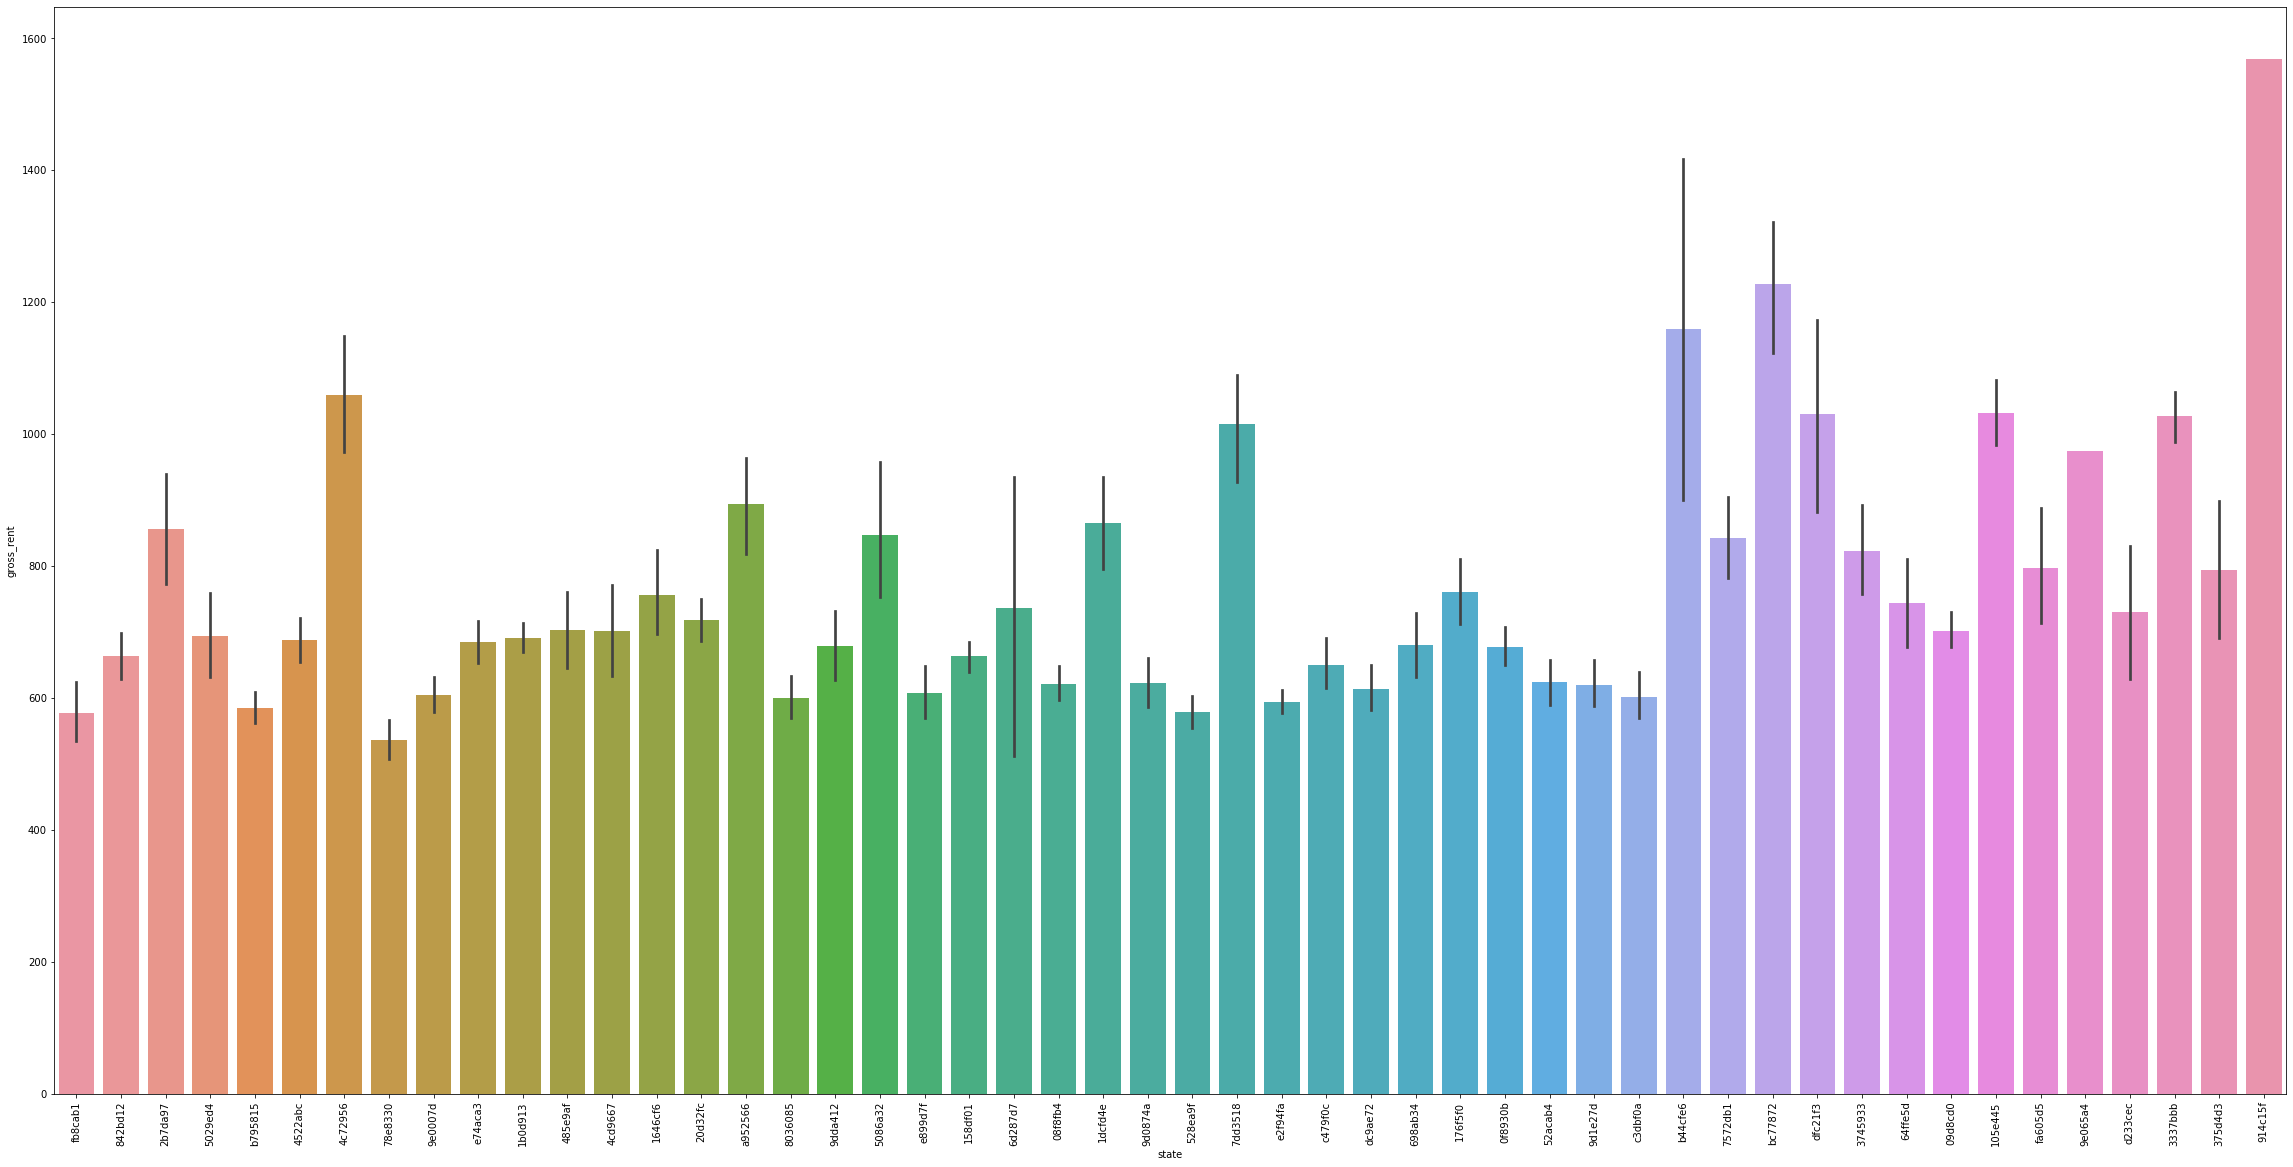

In [51]:
plt.figure(figsize=(40,20))
sns.barplot(x='state',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [52]:
df['rucc'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         301
Metro - Counties in metro areas of 1 million population or more                                  219
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    215
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     206
Metro - Counties in metro areas of 250,000 to 1 million population                               193
Metro - Counties in metro areas of fewer than 250,000 population                                 165
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        120
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          101
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       42
Name: rucc, dtype: int64

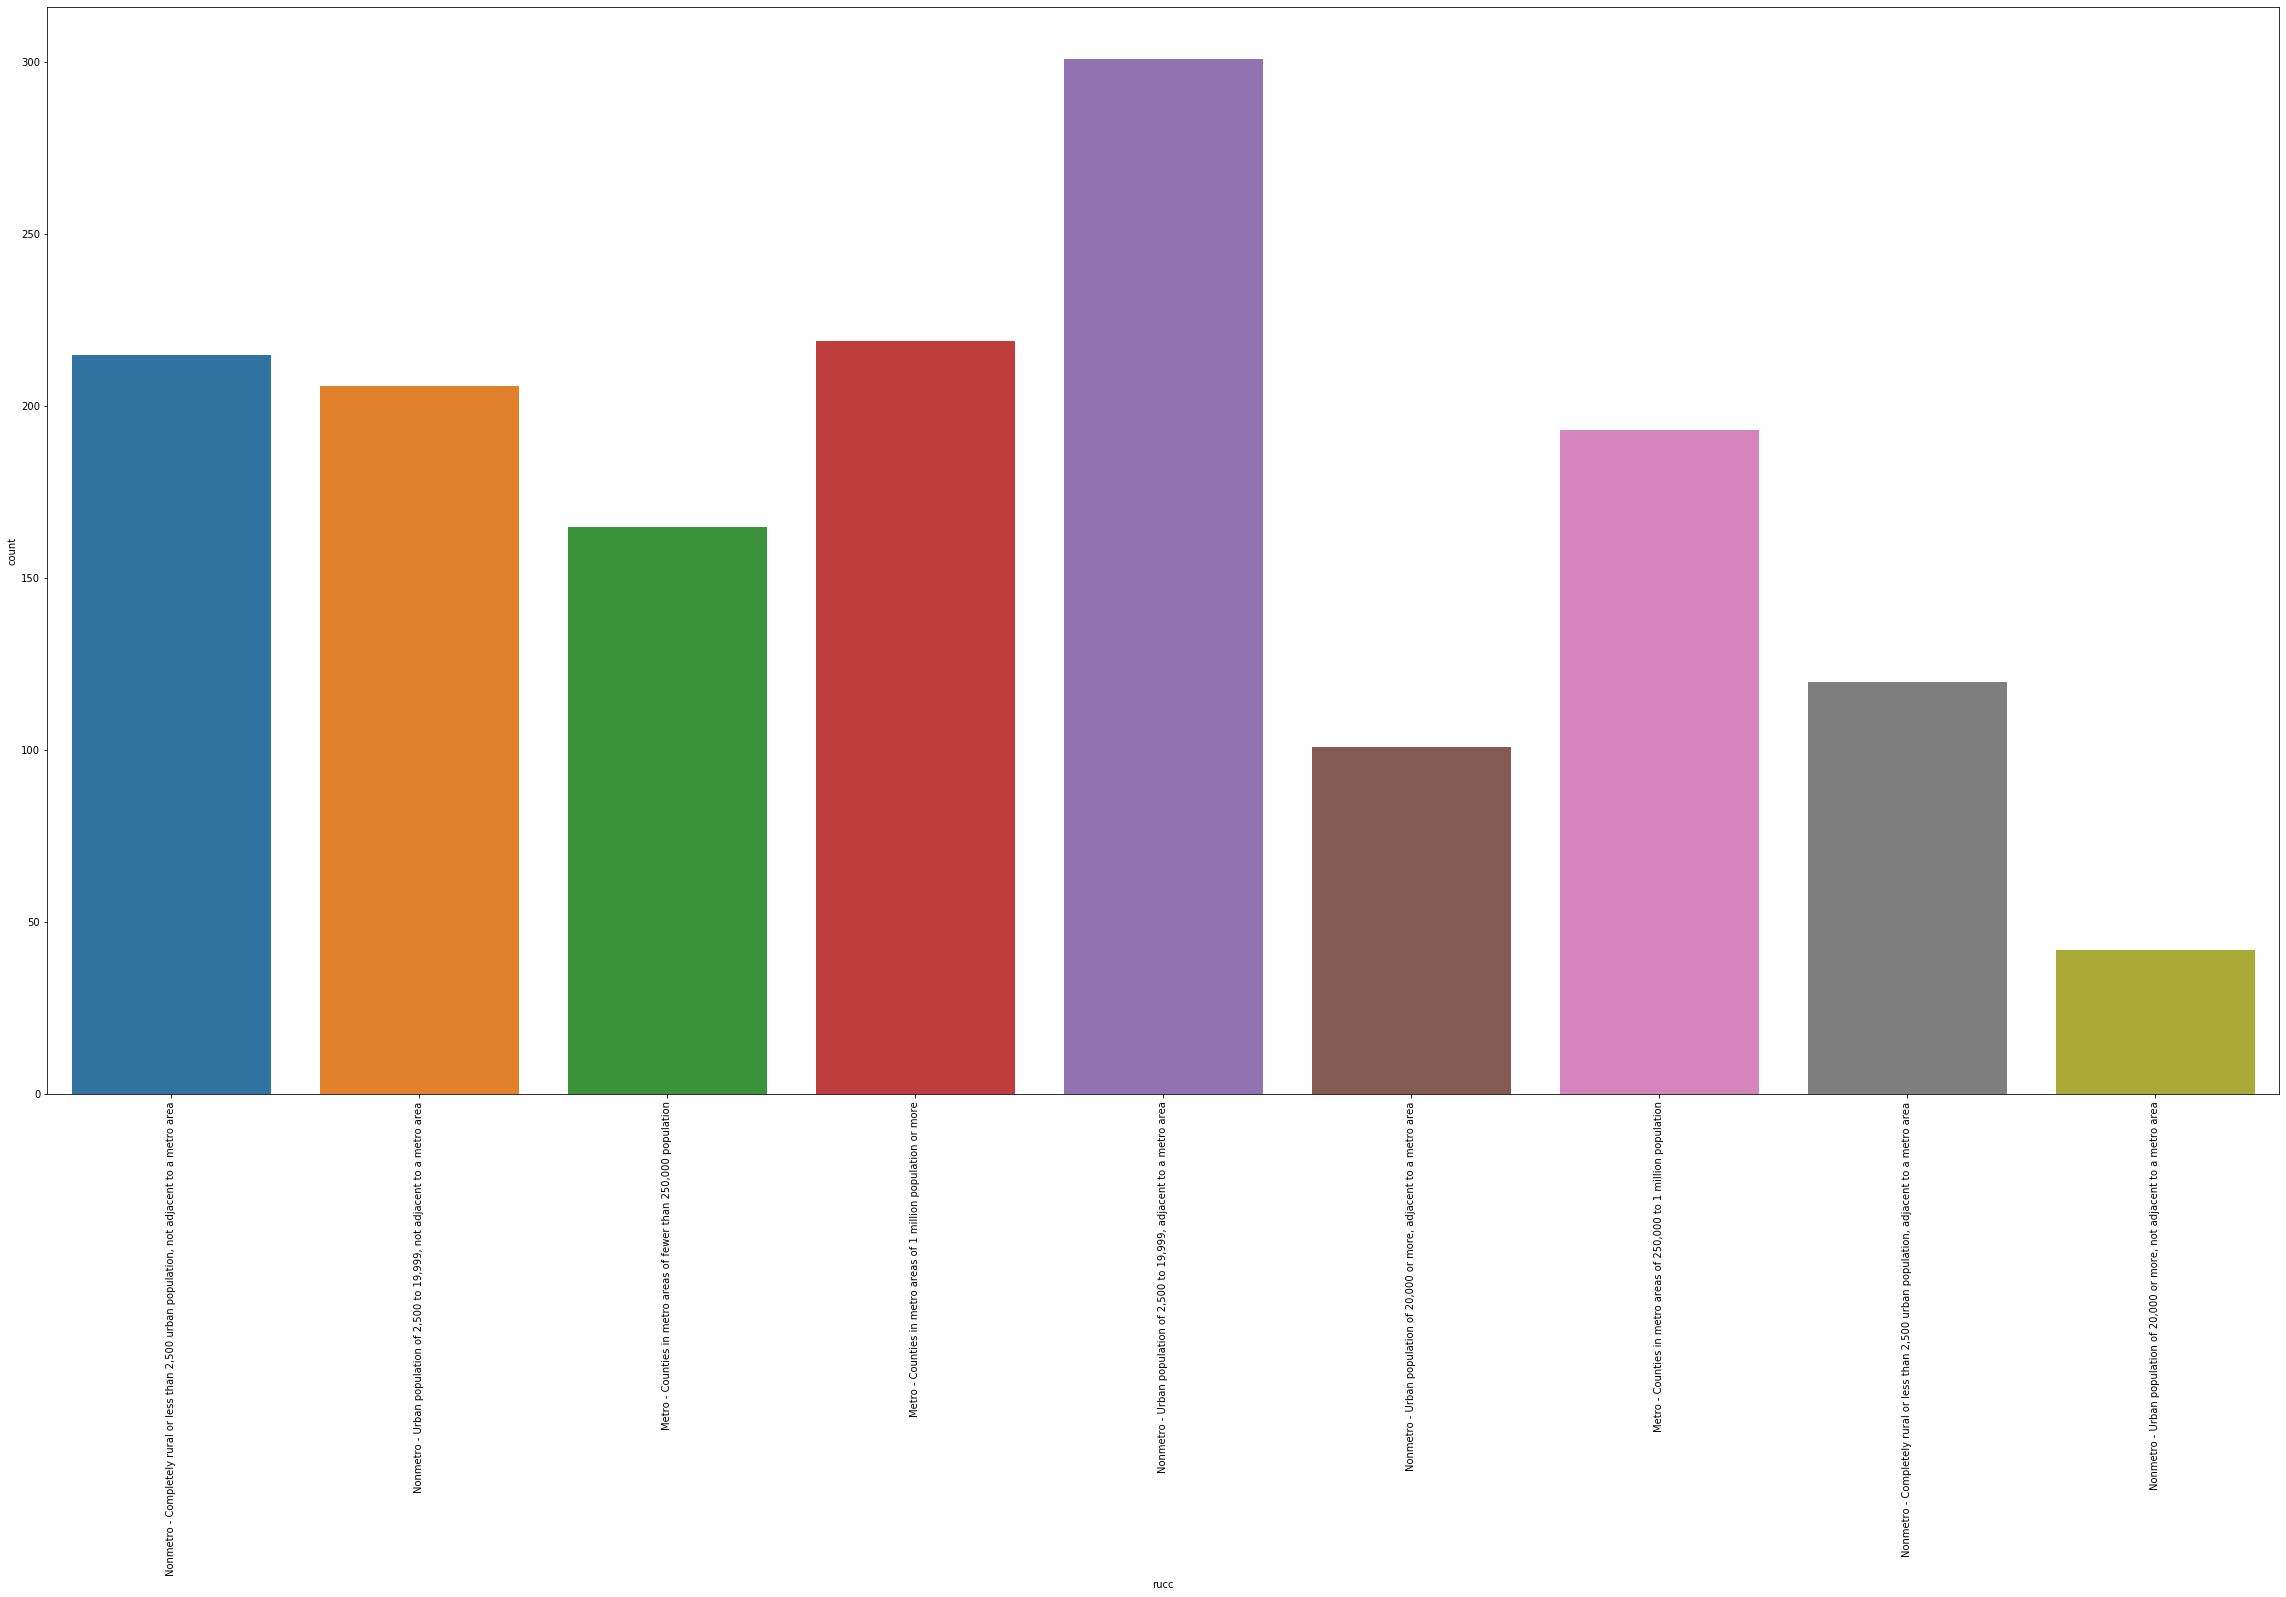

In [53]:
plt.figure(figsize=(40,20))
sns.countplot(x='rucc',data=df_cat)
plt.xticks(rotation=90)
plt.show()

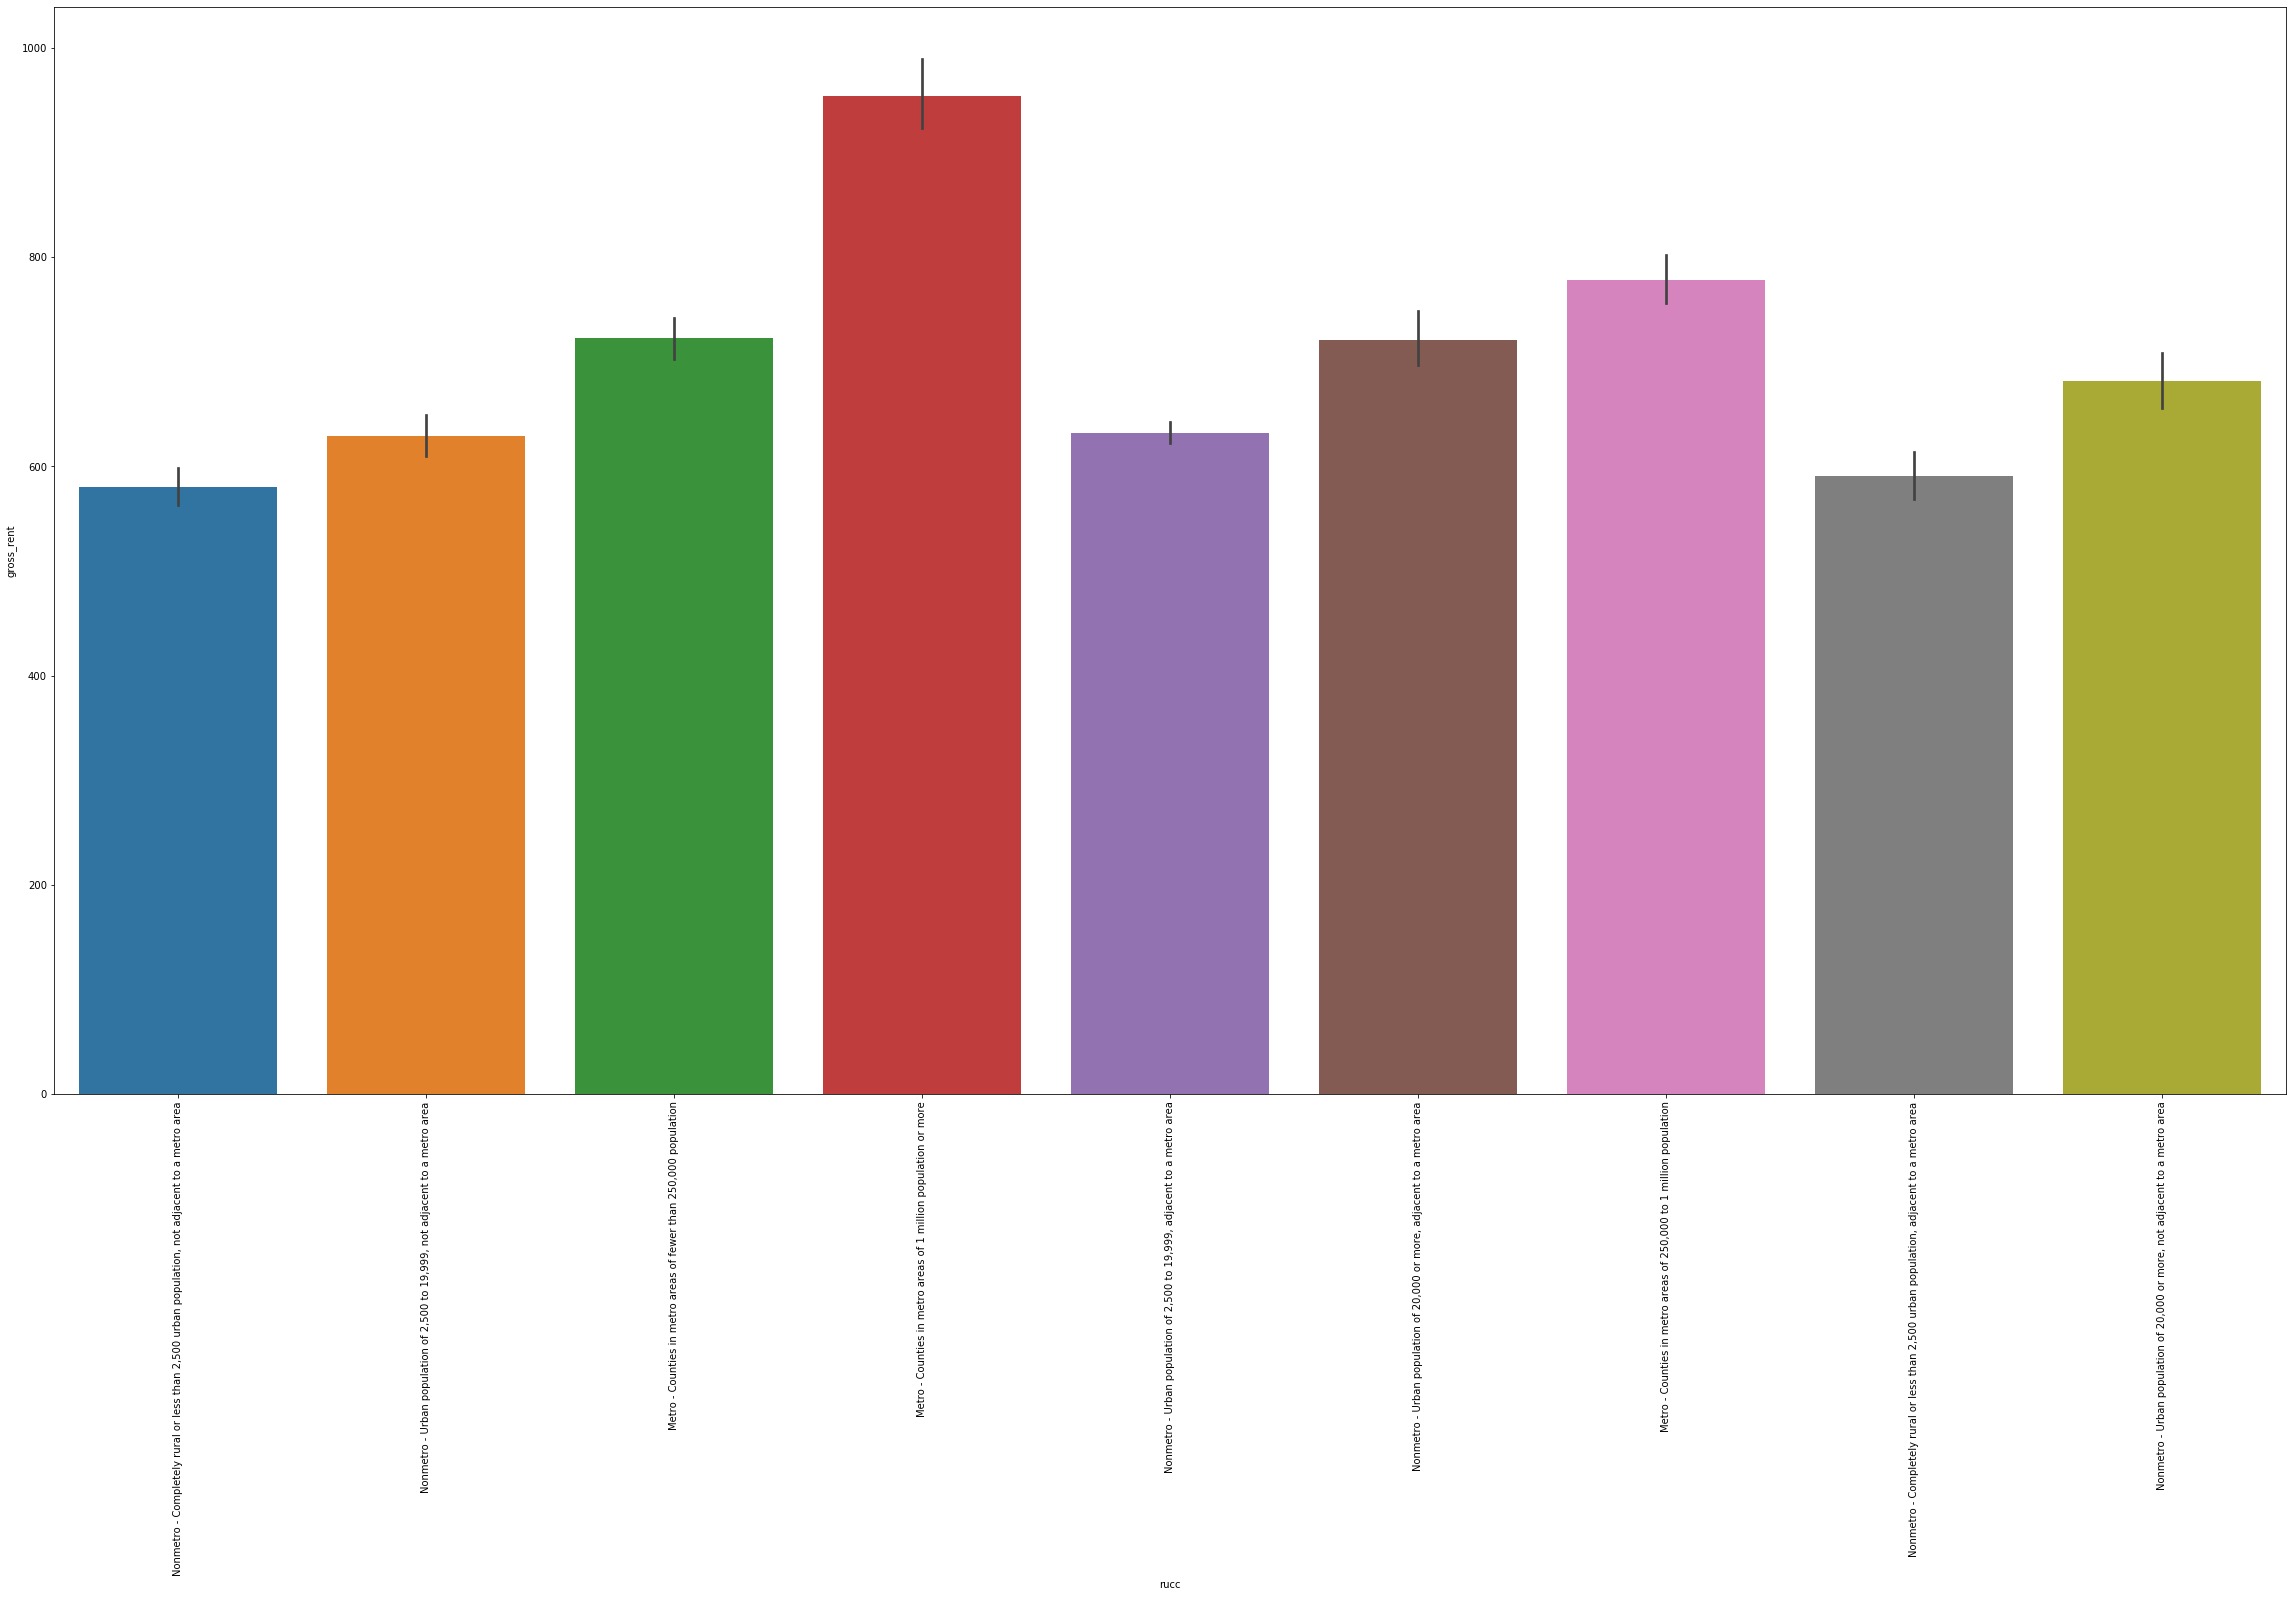

In [54]:
plt.figure(figsize=(40,20))
sns.barplot(x='rucc',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [55]:
df['urban_influence'].value_counts()

Small-in a metro area with fewer than 1 million residents                                             358
Large-in a metro area with at least 1 million residents or more                                       219
Noncore adjacent to a small metro with town of at least 2,500 residents                               178
Micropolitan not adjacent to a metro area                                                             131
Micropolitan adjacent to a small metro area                                                           113
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                 97
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents              88
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                           86
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents     86
Noncore adjacent to a large metro area        

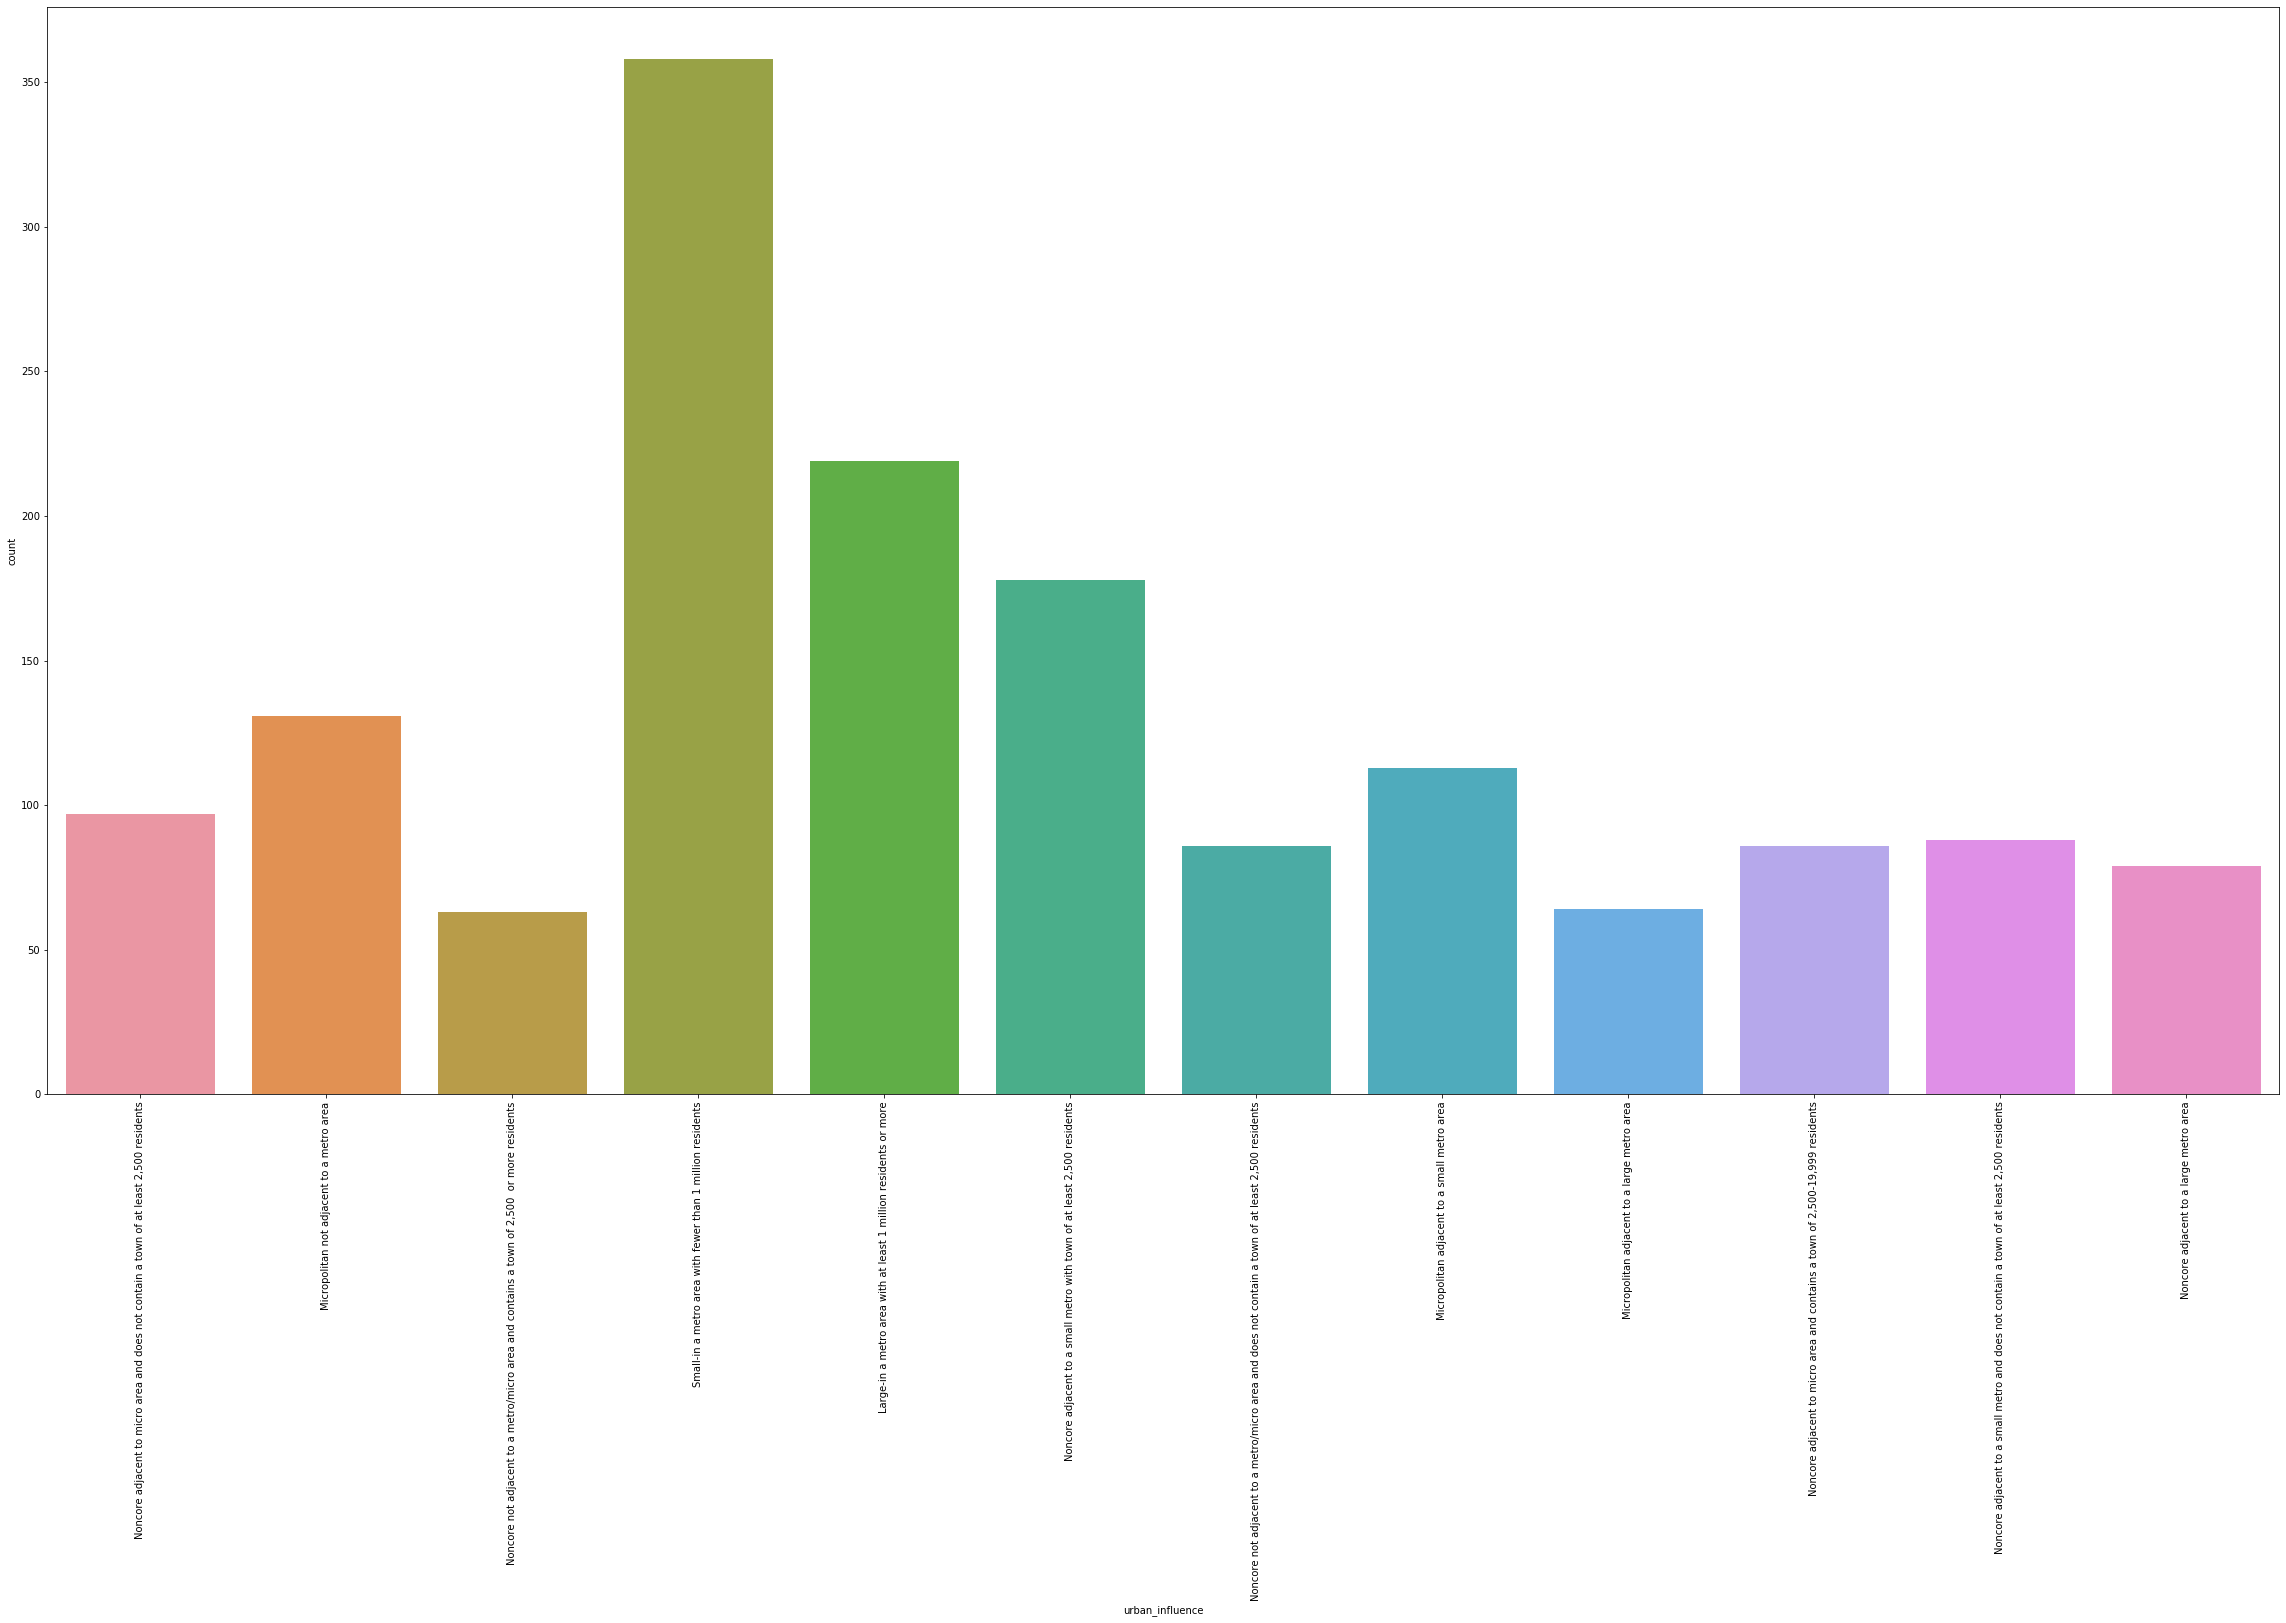

In [56]:
plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.countplot(x='urban_influence',data=df_cat)
plt.show()

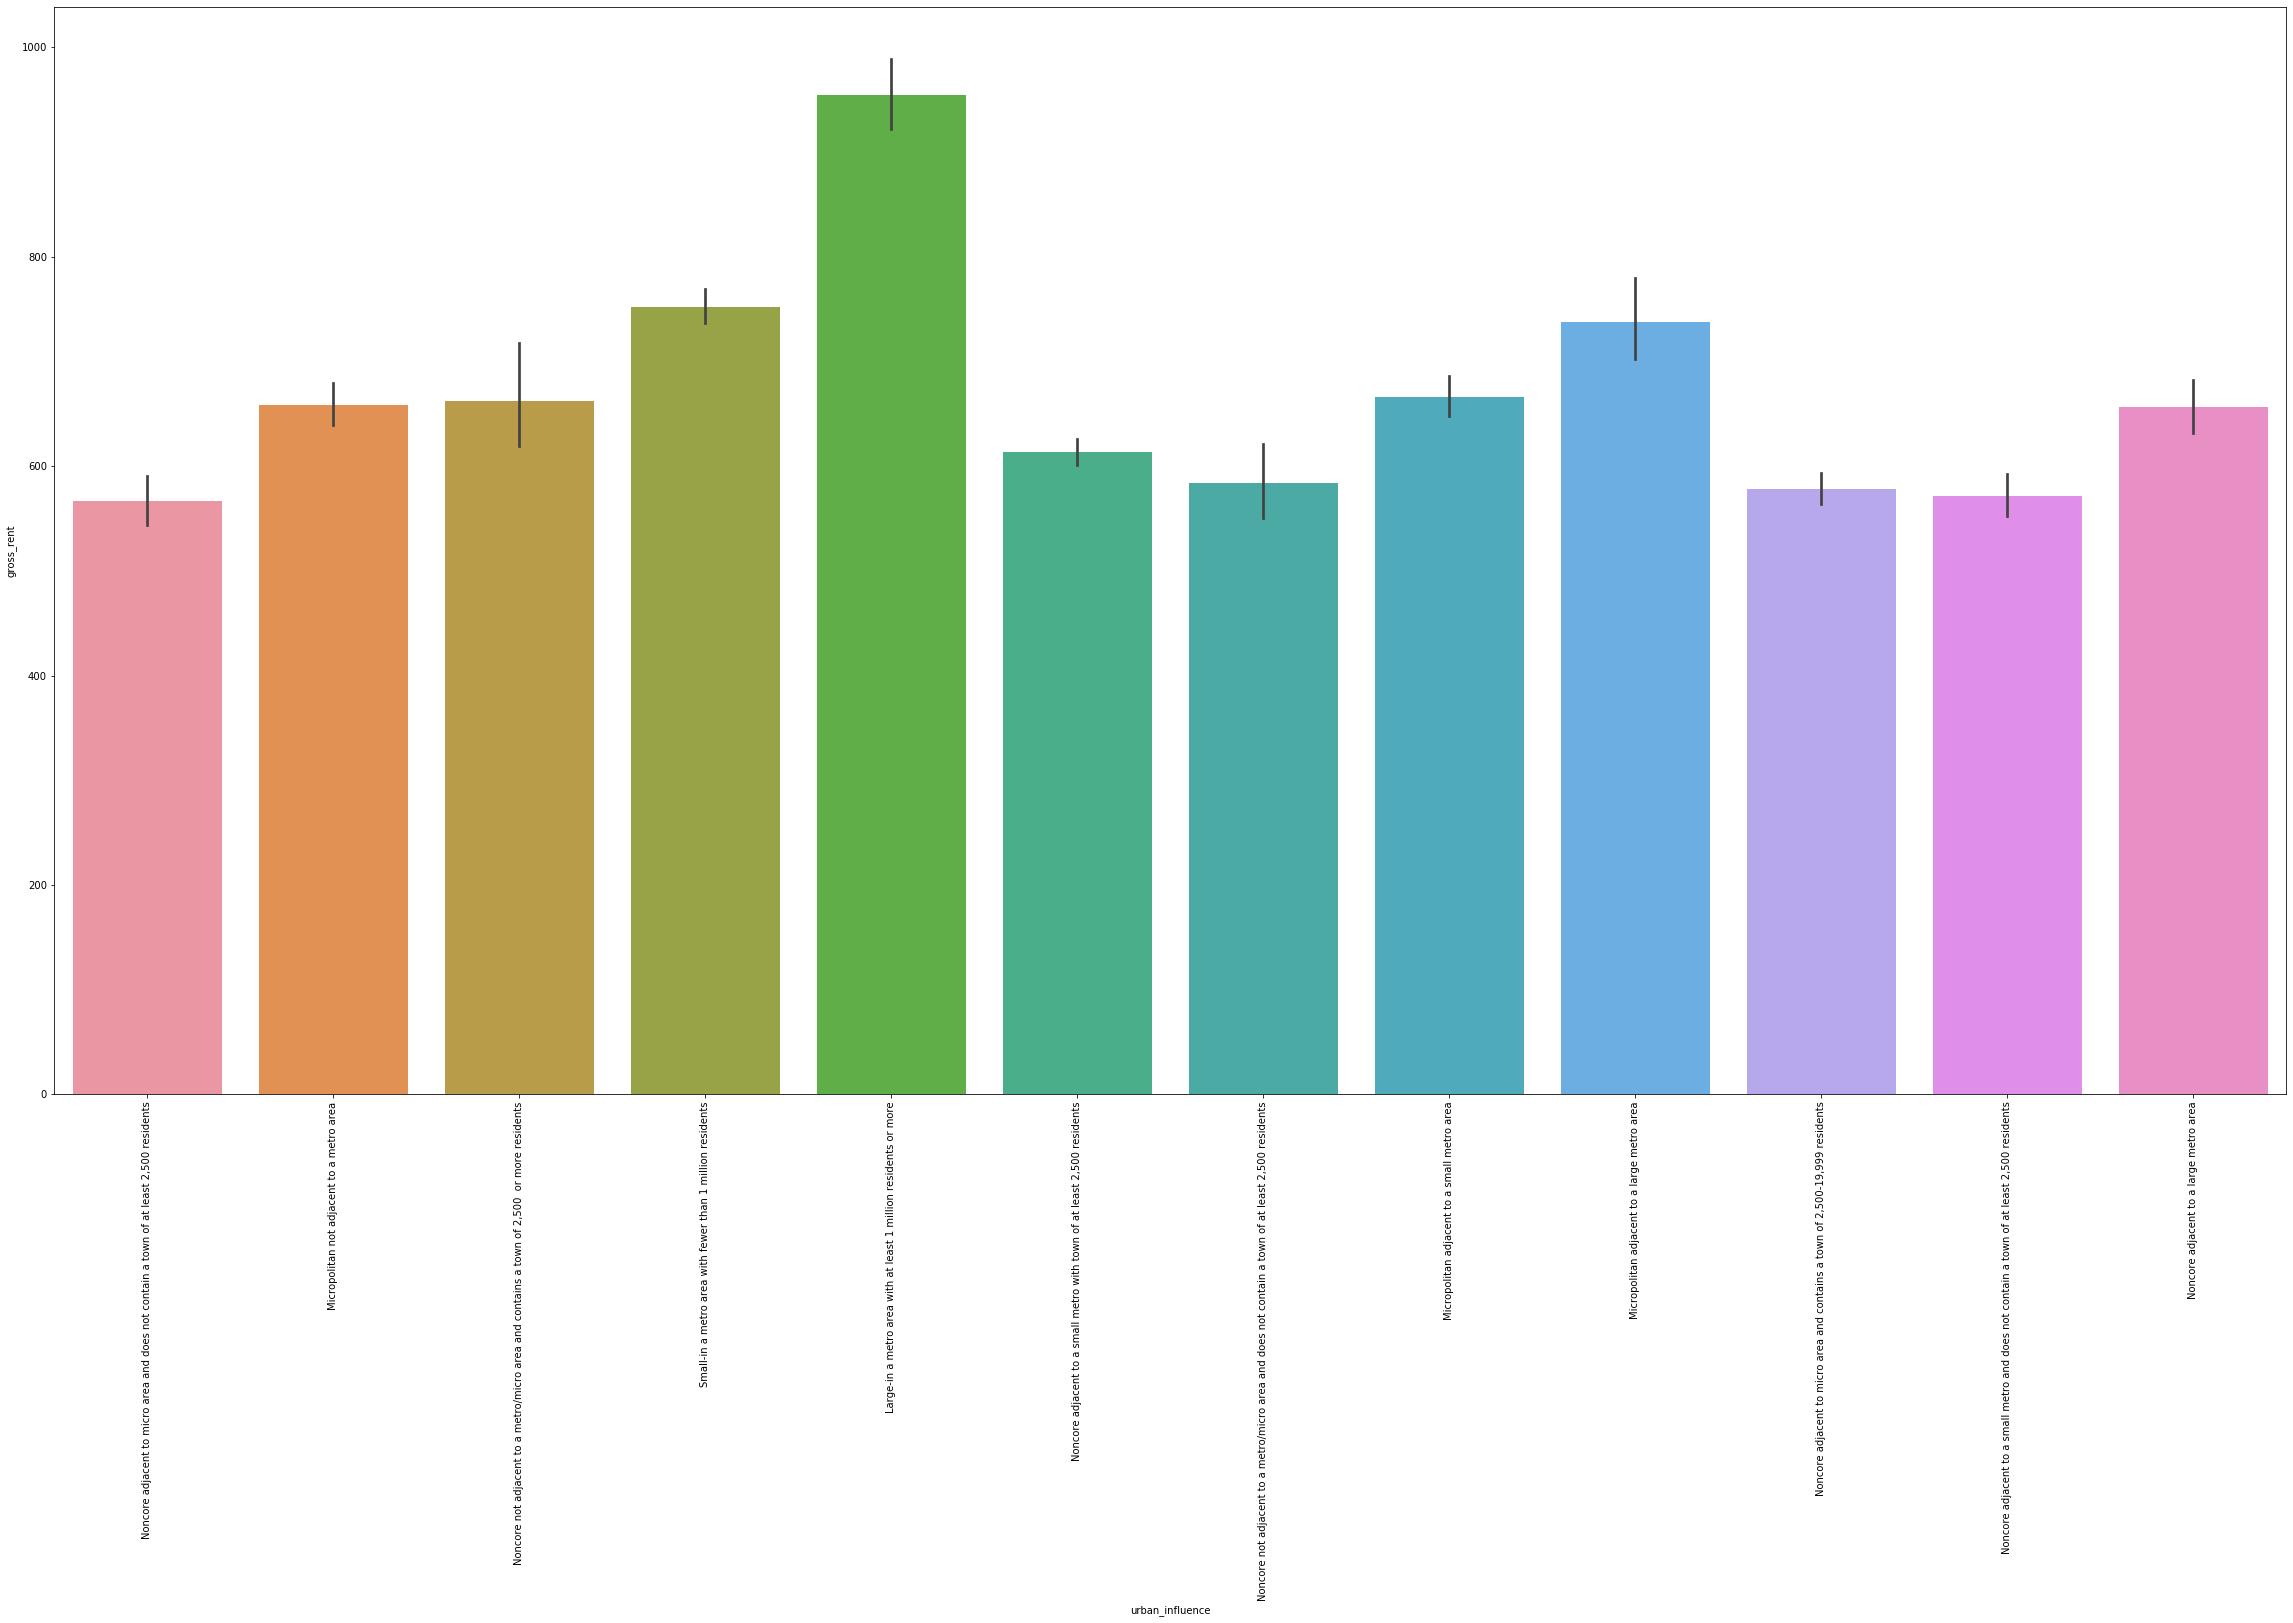

In [57]:
plt.figure(figsize=(40,20))
sns.barplot(x='urban_influence',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [58]:
df['economic_typology'].value_counts()

Nonspecialized                        631
Manufacturing-dependent               244
Farm-dependent                        217
Federal/State government-dependent    191
Recreation                            166
Mining-dependent                      113
Name: economic_typology, dtype: int64

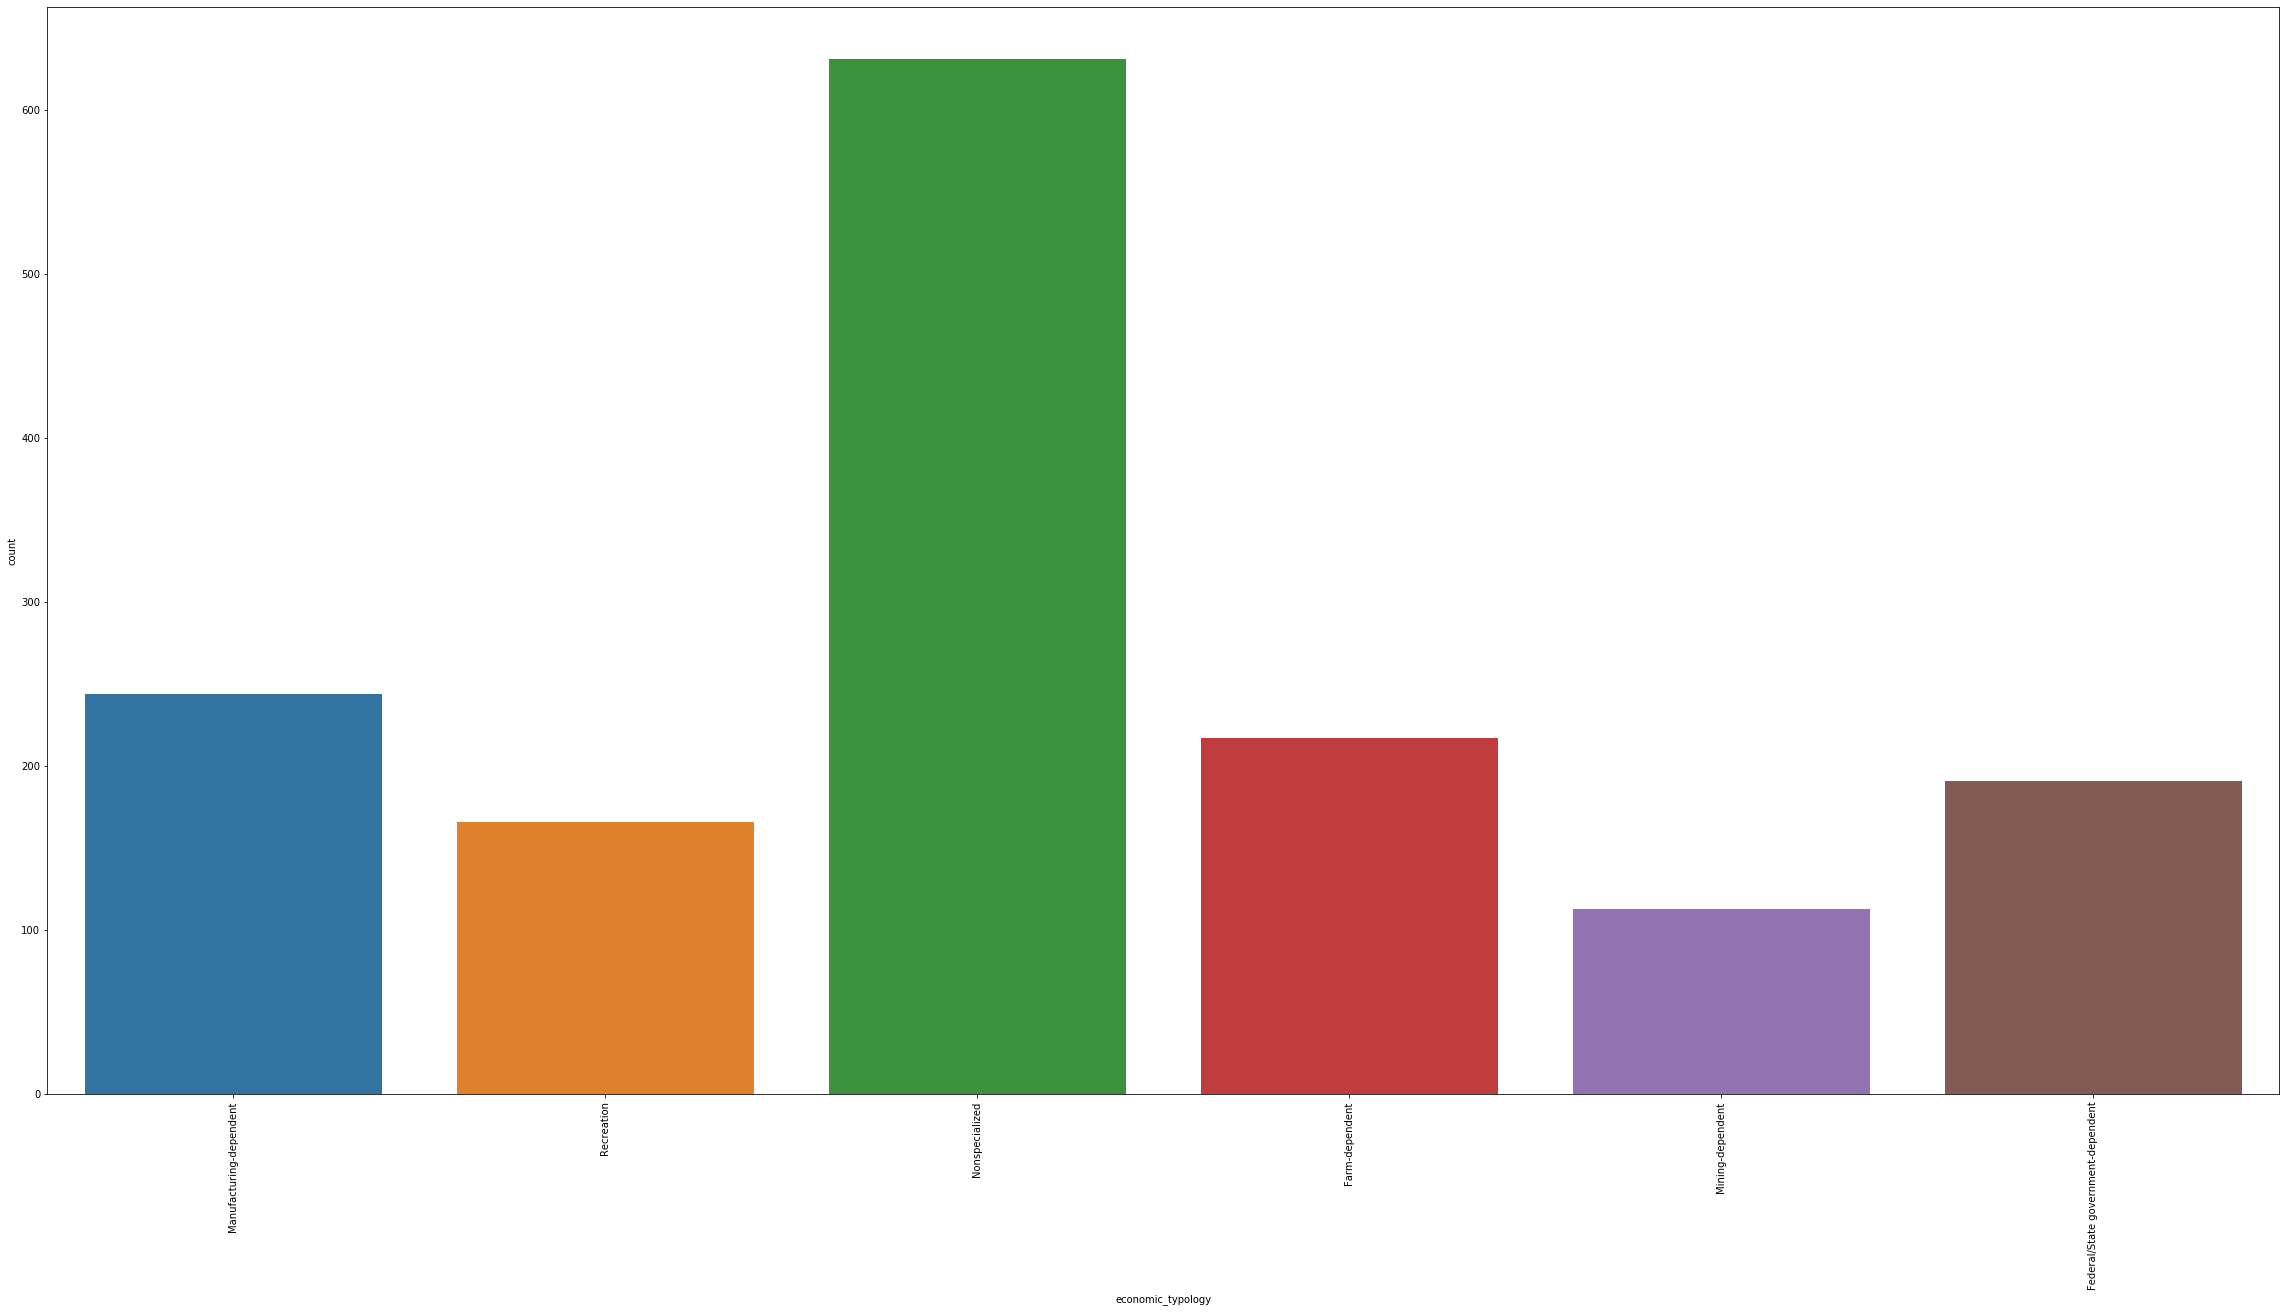

In [59]:
plt.figure(figsize=(40,20))
sns.countplot(x='economic_typology',data=df_cat)
plt.xticks(rotation=90)
plt.show()

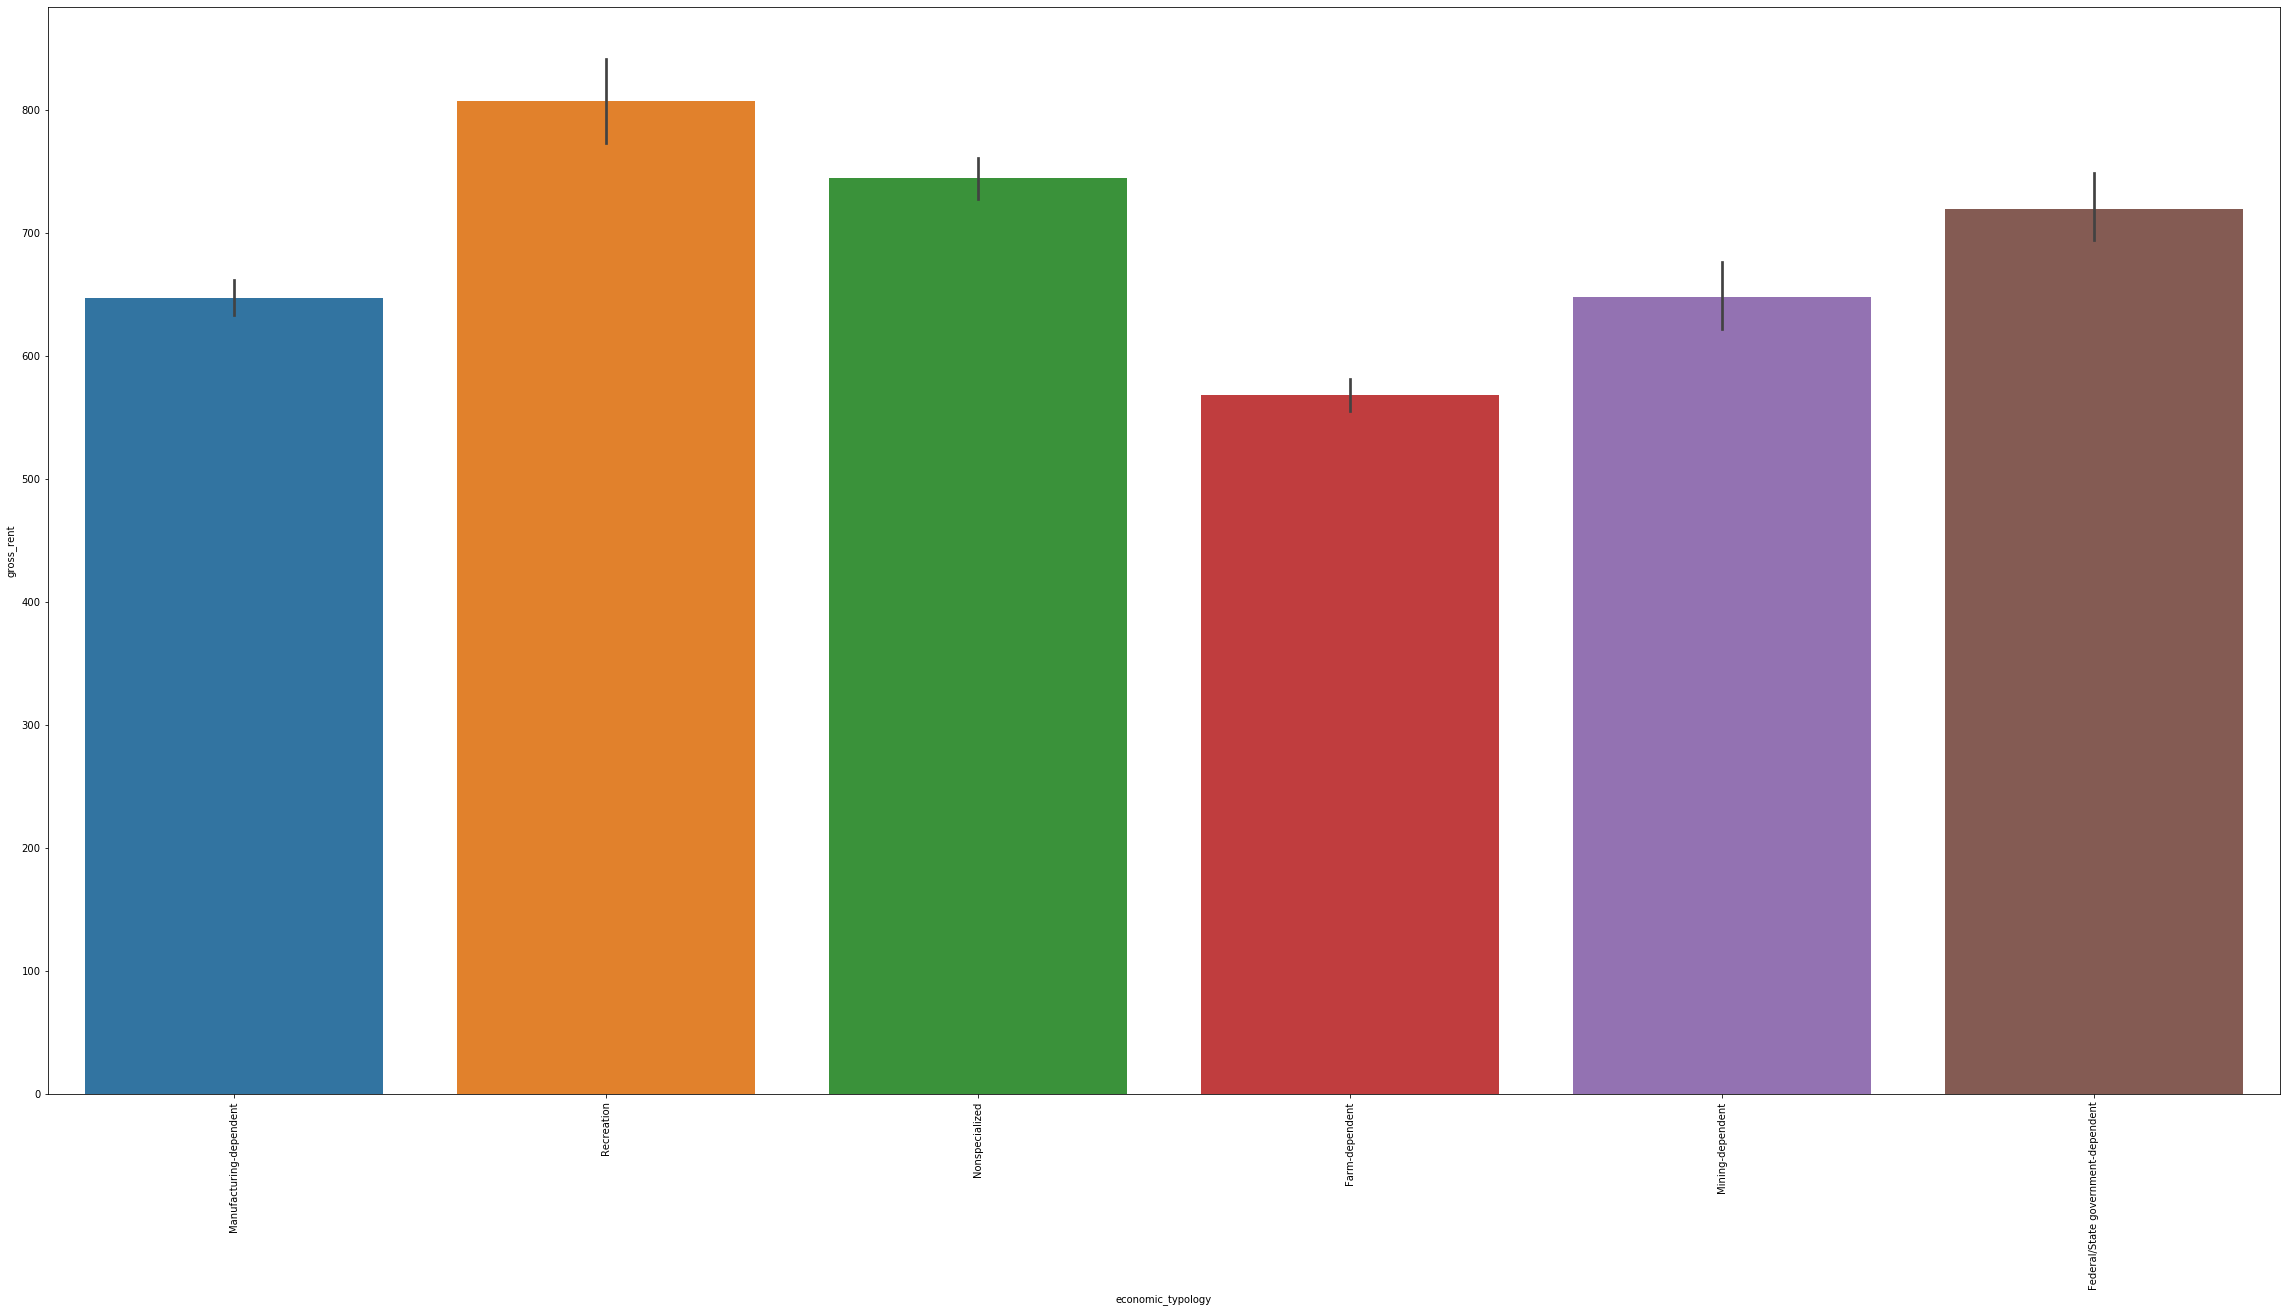

In [60]:
plt.figure(figsize=(40,20))
sns.barplot(x='economic_typology',y=df_cat.gross_rent,data=df_cat)
plt.xticks(rotation=90)
plt.show()

### Using Correlation to check colinearity

In [61]:
corrmat = df_numeric.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.5]
corrmat = corrmat[corrmat < 1]

In [62]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature_1','feature_2','corr_val']
corrmat.head()

feature_1                   feature_2  corr_val
0                  population  renter_occupied_households  0.979015
1  renter_occupied_households                  population  0.979015
2                   evictions                  population  0.800173
3                  population                   evictions  0.800173
4                   evictions  renter_occupied_households  0.790723

**Multicollinearity detected between population, renter_occupied_households,evictions**